## 1. Importing the Dataset

We begin by importing the train and test dataset using `pandas`. This will allow us to explore and preprocess the data to prepare it for modeling.

In [51]:
import pandas as pd
train_data = pd.read_csv('train_data.csv',sep = ',')
train_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [52]:
test_data = pd.read_csv('test_data.csv', sep=',')
test_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,29,admin.,single,secondary,no,390,yes,no,unknown,5,may,137,1,-1,0,unknown,no
1,58,technician,married,unknown,no,71,yes,no,unknown,5,may,71,1,-1,0,unknown,no
2,57,services,married,secondary,no,162,yes,no,unknown,5,may,174,1,-1,0,unknown,no
3,32,blue-collar,single,primary,no,23,yes,yes,unknown,5,may,160,1,-1,0,unknown,no
4,25,services,married,secondary,no,50,yes,no,unknown,5,may,342,1,-1,0,unknown,no


In [53]:
# check the shape of the data 
train_data.shape
test_data.shape

(13562, 17)

In [54]:
# check the data types and number of entries for each variable
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31649 entries, 0 to 31648
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        31649 non-null  int64 
 1   job        31649 non-null  object
 2   marital    31649 non-null  object
 3   education  31649 non-null  object
 4   default    31649 non-null  object
 5   balance    31649 non-null  int64 
 6   housing    31649 non-null  object
 7   loan       31649 non-null  object
 8   contact    31649 non-null  object
 9   day        31649 non-null  int64 
 10  month      31649 non-null  object
 11  duration   31649 non-null  int64 
 12  campaign   31649 non-null  int64 
 13  pdays      31649 non-null  int64 
 14  previous   31649 non-null  int64 
 15  poutcome   31649 non-null  object
 16  y          31649 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13562 entries, 0 to 13561
Data columns (total 17 

##  Initial Data Notes

- The dataset contains **31,649 rows** and **17 variables**, including the target variable `y`.
- There are **no null (missing) values** reported in any of the columns according to `.info()`.
- Out of the 17 columns:
  - **7 are numeric** (`int64`)
  - **10 are categorical** (`object`), including the target variable `y`
- Let’s now explore **summary statistics** and **value distributions** for the continuous variables to better understand their scale and characteristics.


In [55]:
# show the central tendencies for each continuous variable
train_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000
mean,40.888369,1358.437865,15.814149,258.291921,2.764100,40.703908,0.583557
std,10.640554,2954.028227,8.324378,257.068692,3.101526,100.632853,2.434657
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,71.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,446.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1446.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,58.000000,871.000000,275.000000


##  Descriptive Statistics Notes

- `'balance'` has a **very wide range**, including **negative values** (min = -8019) which may represent overdrafts or errors — we'll need to explore this further.
- `'duration'` has **extremely high variance** and a **maximum value of 4918 seconds**, which could bias the model. While it's predictive, it should be excluded from training to avoid data leakage.
- `'campaign'` appears to be **skewed** — the mean and median are close, but the **maximum of 58 contacts** stands out as a potential outlier.
- `'pdays'` shows the known **placeholder value of -1** heavily skewing the data — this will be treated appropriately (e.g., binary flag or separate handling).
- `'previous'` is highly **right-skewed**, with a **median of 0** and a **maximum of 275** — suggesting most clients had no previous contacts.
- `'age'`, `'day'`, and `'campaign'` seem relatively **normally distributed**, but we’ll confirm that during the EDA with histograms. 

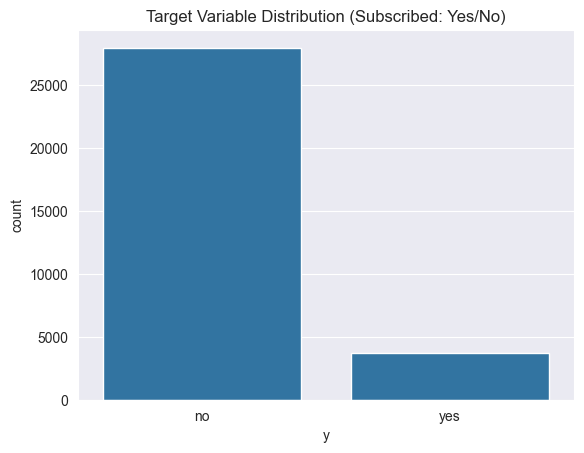

In [56]:
# Value counts of the target variable
train_data['y'].value_counts()
# Visualizing class distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=train_data, x='y')
plt.title("Target Variable Distribution (Subscribed: Yes/No)")
plt.show()

##  Target Variable (`y`) Distribution Notes

- The bar plot shows a **significant class imbalance** in the target variable `y` (Subscribed: Yes/No).
- A **majority of clients did not subscribe** to the product — the "no" class dominates the dataset.
- This imbalance could **bias the model** towards predicting "no" more frequently unless addressed.

## 2. Clean and Prepare Dataset
In this section, we will:

-  Check for and handle any **missing values**.
-  Inspect and understand the **value distributions** in each variable.
-  Investigate any **placeholder values** (e.g., `-1`, `999`, or other irregular entries) and decide on the best strategy:
  - **Impute** missing or placeholder values with statistical estimates (e.g., mean, median).
  - **Drop** entries or variables if they are uninformative or misleading.
  - **Retain** them as-is if they carry meaningful signals for the prediction task.


In [57]:
# Check for missing values
train_data.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

##  Missing Value Check

- We verified that **none of the 17 columns** in the training dataset contain missing (`NaN`) values.
- This suggests that the dataset is **clean in terms of nulls**, which simplifies preprocessing.
- However, we still need to watch out for **placeholder or encoded missing values**, such as:
  - `'pdays'` = -1 (indicating no previous contact)
  - Potential anomalies like negative `'balance'` values

##  Value Counts

To better appreciate and more easily analyze our different variables, we first **separate them into categorical and continuous groups**.

This allows us to:
- Get a quick understanding of the **distribution and variety** in each categorical feature.
- Identify possible issues like **imbalanced categories**, **unexpected values**, or **data entry inconsistencies**.
- Focus our EDA and preprocessing steps more effectively based on variable types.


In [58]:
# create a list of continous and categortical variables based on data type
cont_vars = []
cat_vars = []

for col in train_data.columns:
    if train_data[col].dtype == 'O':
        cat_vars.append(col)
    else:
        cont_vars.append(col)

print(f'There are {len(cat_vars)} categorical variables: \n', cat_vars)
print('----' * 8)
print(f'There are {len(cont_vars)} continuous variables: \n', cont_vars)

There are 10 categorical variables: 
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
--------------------------------
There are 7 continuous variables: 
 ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [59]:
# check the number of unique values and the percent each value represents
# for each categoritcal variable
for v in cat_vars:
    print(f'Unique values for {v}: {train_data[v].nunique()}\n',
          round(train_data[v].value_counts(normalize=True)* 100, 2), '\n')

Unique values for job: 12
 job
blue-collar      21.28
management       21.07
technician       16.95
admin.           11.49
services          9.18
retired           4.99
self-employed     3.51
entrepreneur      3.39
housemaid         2.75
unemployed        2.70
student           2.03
unknown           0.66
Name: proportion, dtype: float64 

Unique values for marital: 3
 marital
married     60.24
single      28.47
divorced    11.29
Name: proportion, dtype: float64 

Unique values for education: 4
 education
secondary    51.1
tertiary     29.7
primary      15.1
unknown       4.1
Name: proportion, dtype: float64 

Unique values for default: 2
 default
no     98.21
yes     1.79
Name: proportion, dtype: float64 

Unique values for housing: 2
 housing
yes    55.57
no     44.43
Name: proportion, dtype: float64 

Unique values for loan: 2
 loan
no     83.9
yes    16.1
Name: proportion, dtype: float64 

Unique values for contact: 3
 contact
cellular     64.63
unknown      28.83
telephone     6.5

##  Categorical Variable Value Counts – Summary

We analyzed the distribution of values for each categorical variable to identify dominant classes, imbalances, and potential data quality issues:

- **`job`**:
  - Contains 12 unique job types.
  - Most common: *blue-collar* (21.28%), *management* (21.07%), *technician* (16.95%).
  - Category *unknown* appears (0.66%) and may need handling.
  
- **`marital`**:
  - 3 categories: *married* (60.24%), *single* (28.47%), *divorced* (11.29%).
  - Slight imbalance toward the married group.

- **`education`**:
  - 4 categories: *secondary* (51.1%) is dominant.
  - *unknown* appears in 4.1% — consider imputing or grouping.

- **`default`**:
  - Highly imbalanced: *no* (98.21%) vs *yes* (1.79%).
  - Might not add much predictive value due to low variance.

- **`housing`**:
  - Fairly balanced: *yes* (55.57%) and *no* (44.43%).



##  Dealing with "duration", "unknown", "-1", and Negative Values

---

### ️ Duration:
As stated in the dataset documentation, the `duration` variable should not be used for prediction, as it represents time spent **after** the call, and `0` duration corresponds directly to a "no" response. Including it would lead to **data leakage**, so we will drop it.


###  Handling `"unknown"` in Categorical Variables

Some categorical features such as `job` and `education` contain `"unknown"` values, which likely represent missing or unspecified responses. Rather than removing these rows or columns, we replace `"unknown"` with a more informative label — `"Other"` — to preserve data while avoiding misinterpretation.


In [60]:
train_data['job'] = train_data['job'].replace('unknown', 'Other')
train_data['education'] = train_data['education'].replace('unknown', 'Other')

test_data['job'] = test_data['job'].replace('unknown', 'Other')
test_data['education'] = test_data['education'].replace('unknown', 'Other')

###  Handling -1 in `pdays`

The `pdays` column uses `-1` to indicate that a client was **never contacted previously**. This is a placeholder value and requires careful handling to avoid misleading the model.

We apply two preprocessing steps:

1. **Create a binary flag** (`was_previously_contacted`) to capture whether the client had been contacted before.
2. **Replace `-1` with `999`** so the column can still be used numerically in models that support it (e.g., tree-based models).

This approach preserves the information encoded in `pdays` while making it suitable for machine learning algorithms.


In [61]:
# Binary flag for prior contact
train_data['was_previously_contacted'] = train_data['pdays'].apply(lambda x: 0 if x == -1 else 1)
test_data['was_previously_contacted'] = test_data['pdays'].apply(lambda x: 0 if x == -1 else 1)

# Replace -1 with 999 to retain 'pdays' as a numerical feature
train_data['pdays'] = train_data['pdays'].replace(-1, 999)
test_data['pdays'] = test_data['pdays'].replace(-1, 999)

###  Handling Negative Values in `balance`

The `balance` column contains large **negative values** (e.g., `-8019`), which may represent **overdrafts** or **data entry errors**. These values can skew the data distribution and affect model performance, especially during scaling.

To address this while preserving meaningful signals, we apply two steps:

1. **Create a binary flag** (`has_negative_balance`) to indicate whether a client had a negative balance.
2. **Replace all negative values with 0** to standardize the feature and minimize distortion during scaling.


In [62]:
# Flag for negative balances
train_data['has_negative_balance'] = train_data['balance'].apply(lambda x: 1 if x < 0 else 0)
test_data['has_negative_balance'] = test_data['balance'].apply(lambda x: 1 if x < 0 else 0)

# Replace negative balances with 0
train_data['balance'] = train_data['balance'].apply(lambda x: 0 if x < 0 else x)
test_data['balance'] = test_data['balance'].apply(lambda x: 0 if x < 0 else x)

## 3.  Exploratory Data Analysis (EDA)

Now that we've cleaned the dataset, we'll explore feature distributions and relationships with the target variable (`y`).
This helps us understand:

##  Plot Category Counts and Relationship with `y`

To understand how different categorical variable values relate to the target outcome, we’ll:

- Plot the **overall counts** of each category within a variable.
- Plot the **average rate of subscription (`y = yes`)** for each category.

This helps us begin identifying patterns and relationships that might be useful in predicting a successful marketing campaign.

Before plotting the relationships, we’ll first **convert the target variable `y` into a binary numeric format**, so we can easily compute group-wise averages.


In [63]:
# Convert 'y' to binary
train_data['y'] = train_data['y'].map({'yes': 1, 'no': 0})
test_data['y'] = test_data['y'].map({'yes': 1, 'no': 0})

train_data.head()
# Confirm fix
train_data['y'].value_counts()

y
0    27946
1     3703
Name: count, dtype: int64

In [64]:
# Remove 'y' if it exists in cat_vars
cat_vars = [col for col in cat_vars if col != 'y']

In [65]:
cat_data = train_data[cat_vars + ['y']].copy()
cat_data_test = test_data[cat_vars + ['y']].copy()


In [66]:
cat_data

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,0
1,technician,single,secondary,no,yes,no,unknown,may,unknown,0
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,0
3,blue-collar,married,Other,no,yes,no,unknown,may,unknown,0
4,Other,single,Other,no,no,no,unknown,may,unknown,0
...,...,...,...,...,...,...,...,...,...,...
31644,technician,married,tertiary,no,no,no,cellular,nov,unknown,1
31645,retired,divorced,primary,no,no,no,cellular,nov,unknown,1
31646,retired,married,secondary,no,no,no,cellular,nov,success,1
31647,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,0


In [67]:
cat_data_test

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,admin.,single,secondary,no,yes,no,unknown,may,unknown,0
1,technician,married,Other,no,yes,no,unknown,may,unknown,0
2,services,married,secondary,no,yes,no,unknown,may,unknown,0
3,blue-collar,single,primary,no,yes,yes,unknown,may,unknown,0
4,services,married,secondary,no,yes,no,unknown,may,unknown,0
...,...,...,...,...,...,...,...,...,...,...
13557,self-employed,single,tertiary,no,no,no,cellular,nov,success,1
13558,retired,married,secondary,no,no,no,cellular,nov,success,1
13559,blue-collar,single,secondary,no,yes,no,cellular,nov,other,0
13560,technician,married,secondary,no,yes,no,cellular,nov,unknown,1


C:\Users\MR.SARIM\AppData\Local\Temp\ipykernel_10428\1253850839.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_percent.index, y=cat_percent.values, palette='PuBuGn_d')


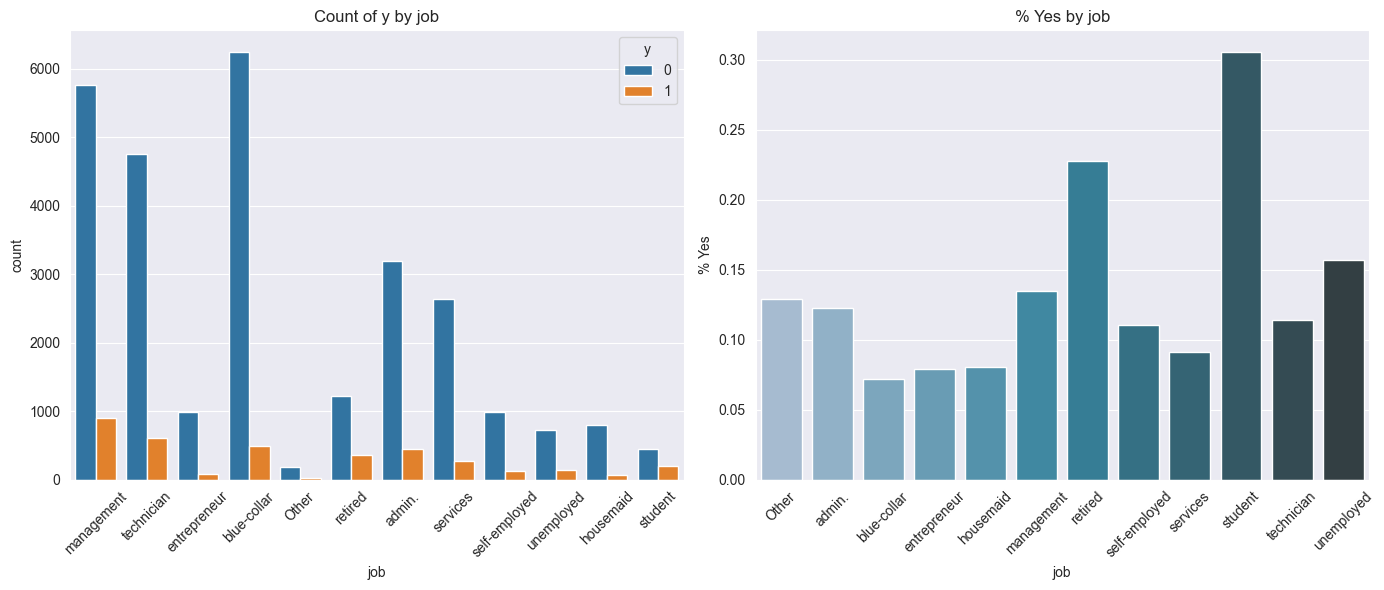

C:\Users\MR.SARIM\AppData\Local\Temp\ipykernel_10428\1253850839.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_percent.index, y=cat_percent.values, palette='PuBuGn_d')


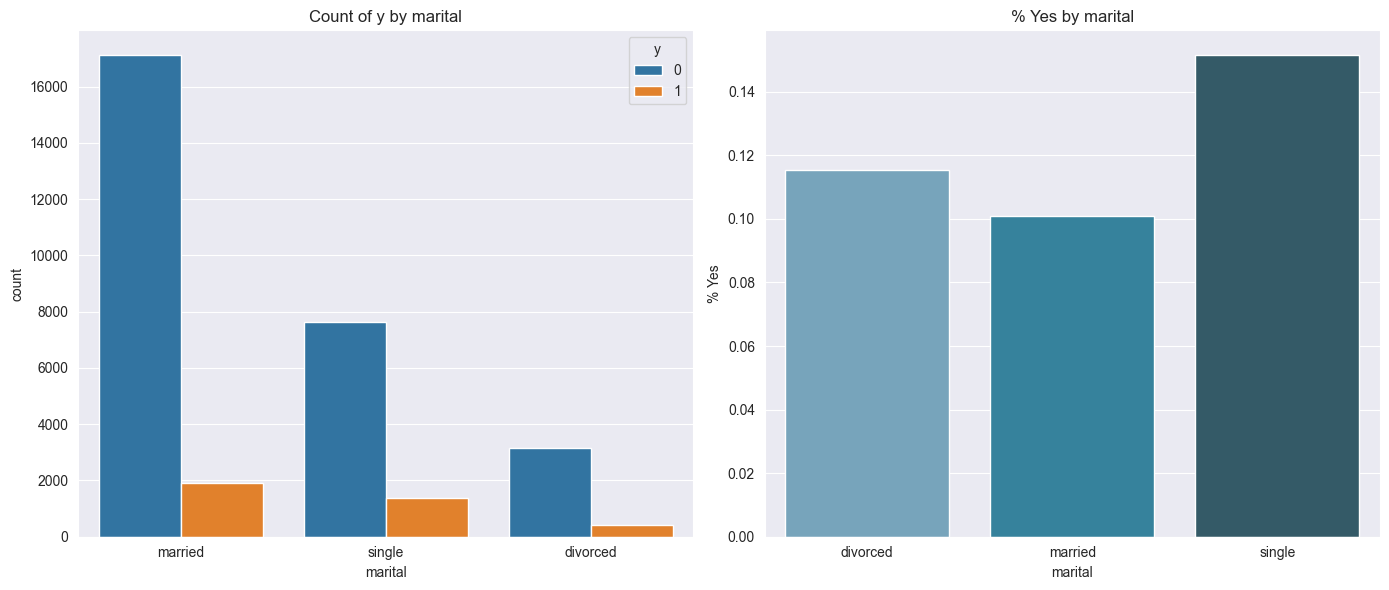

C:\Users\MR.SARIM\AppData\Local\Temp\ipykernel_10428\1253850839.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_percent.index, y=cat_percent.values, palette='PuBuGn_d')


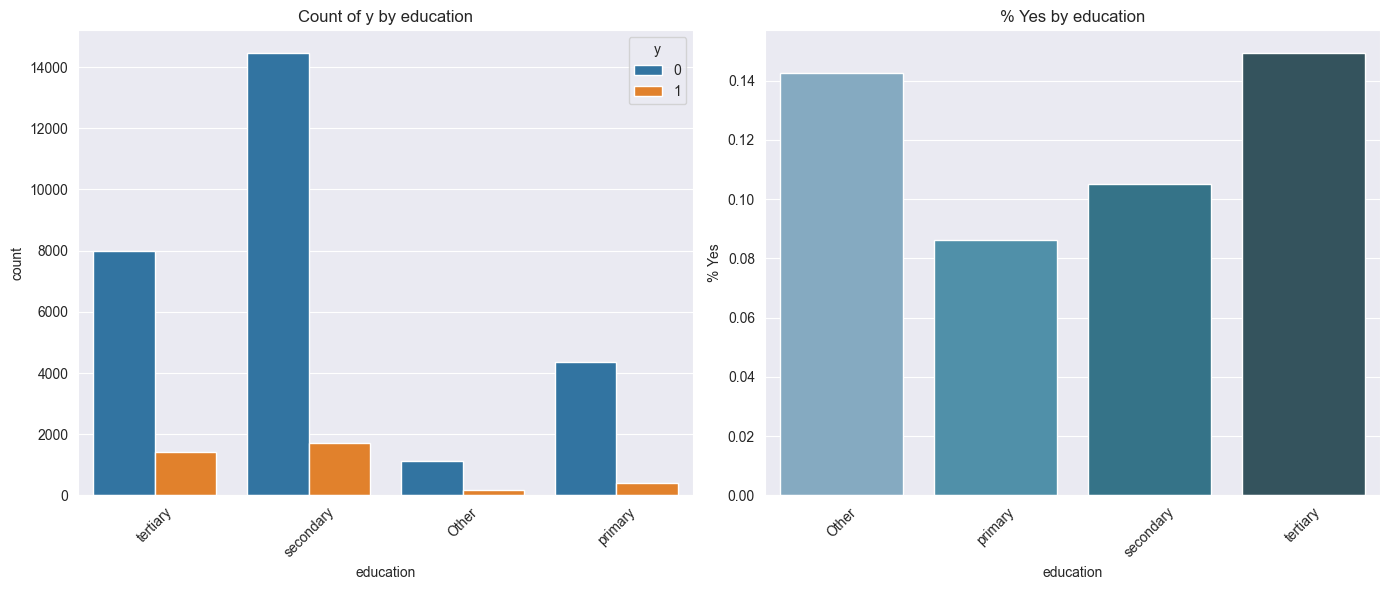

C:\Users\MR.SARIM\AppData\Local\Temp\ipykernel_10428\1253850839.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_percent.index, y=cat_percent.values, palette='PuBuGn_d')


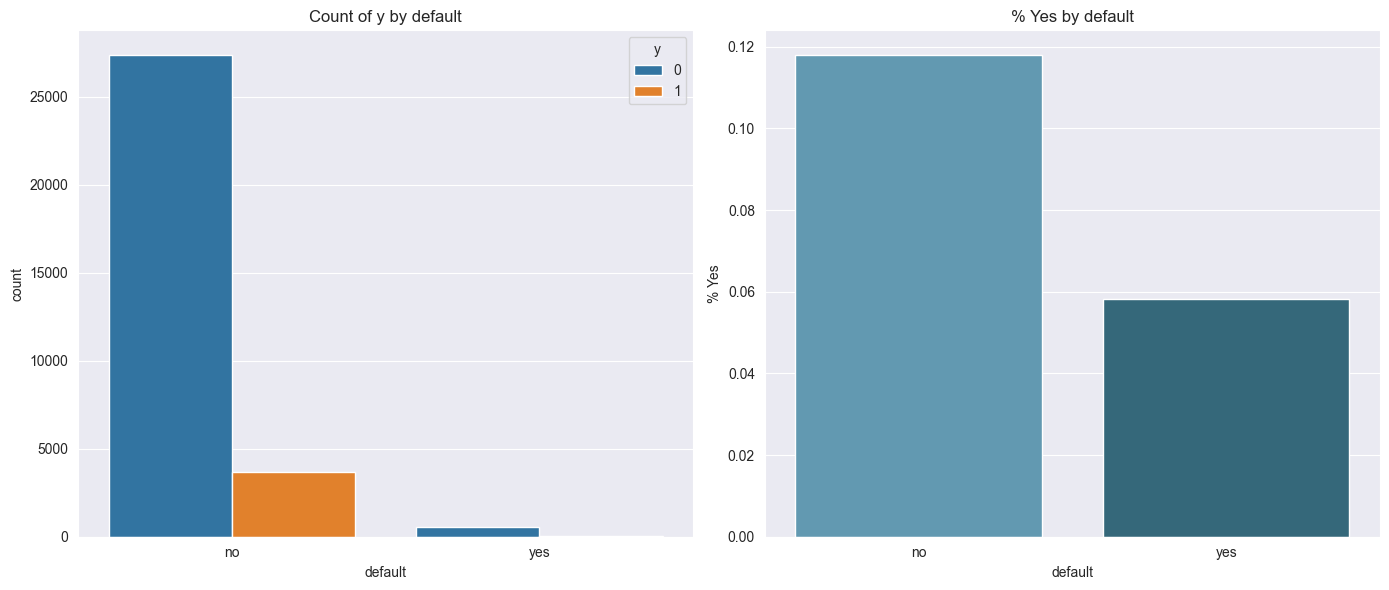

C:\Users\MR.SARIM\AppData\Local\Temp\ipykernel_10428\1253850839.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_percent.index, y=cat_percent.values, palette='PuBuGn_d')


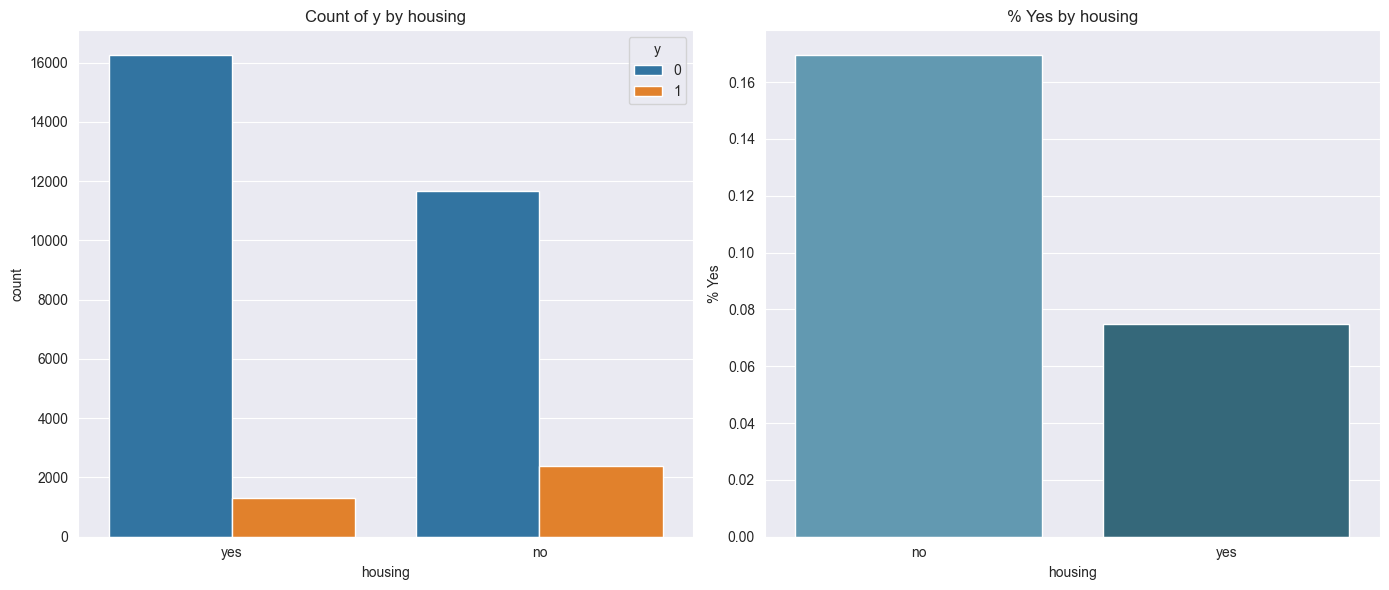

C:\Users\MR.SARIM\AppData\Local\Temp\ipykernel_10428\1253850839.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_percent.index, y=cat_percent.values, palette='PuBuGn_d')


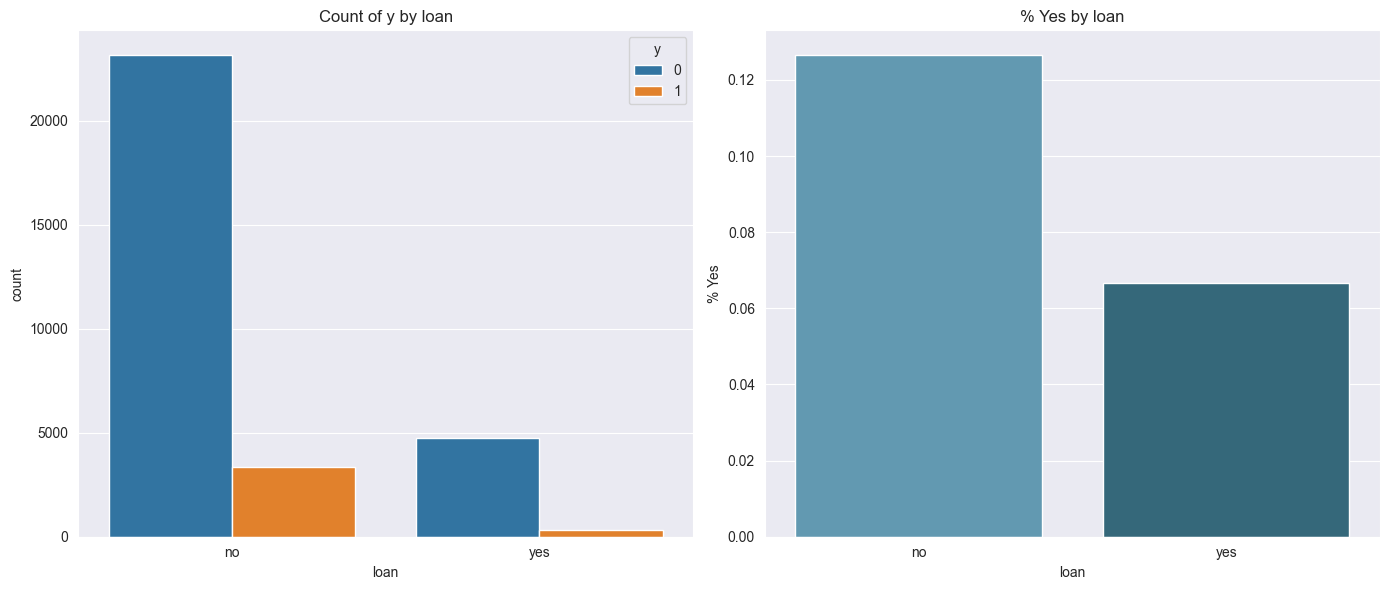

C:\Users\MR.SARIM\AppData\Local\Temp\ipykernel_10428\1253850839.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_percent.index, y=cat_percent.values, palette='PuBuGn_d')


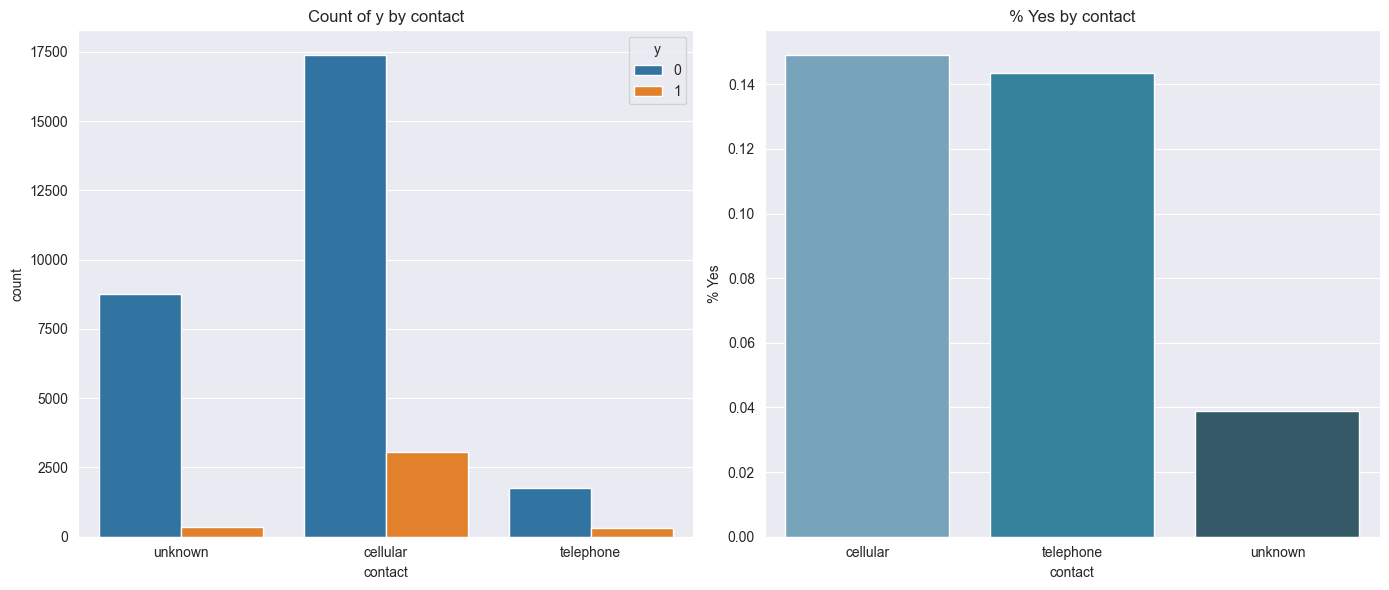

C:\Users\MR.SARIM\AppData\Local\Temp\ipykernel_10428\1253850839.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_percent.index, y=cat_percent.values, palette='PuBuGn_d')


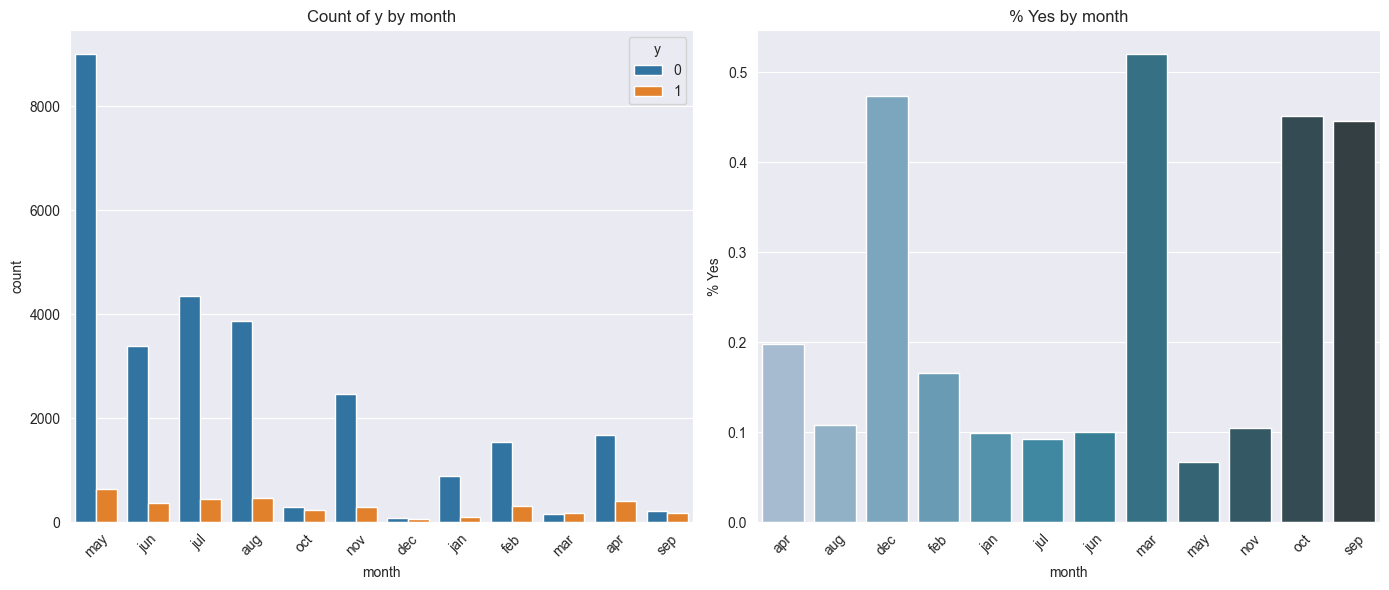

C:\Users\MR.SARIM\AppData\Local\Temp\ipykernel_10428\1253850839.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_percent.index, y=cat_percent.values, palette='PuBuGn_d')


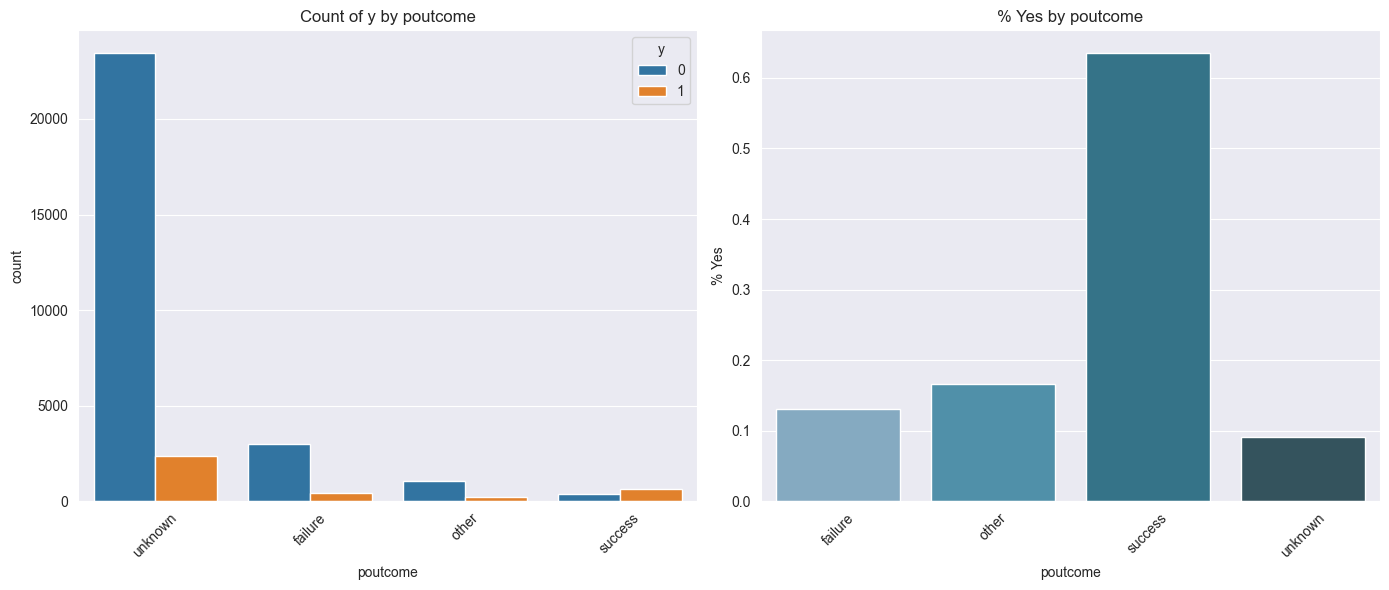

In [68]:
# Plot value counts and % of 'yes' (y=1) for each categorical variable
for col in cat_vars:
    plt.figure(figsize=(14, 6))

    # Countplot of target distribution by category
    plt.subplot(1, 2, 1)
    sns.countplot(x=cat_data[col], data=cat_data, hue=cat_data['y'])
    plt.title(f'Count of y by {col}')
    if cat_data[col].nunique() > 3:
        plt.xticks(rotation=45)

    # Mean % of 'yes' responses by category
    plt.subplot(1, 2, 2)
    cat_percent = cat_data.groupby(col)['y'].mean()
    sns.barplot(x=cat_percent.index, y=cat_percent.values, palette='PuBuGn_d')
    plt.ylabel('% Yes')
    plt.title(f'% Yes by {col}')
    if cat_data[col].nunique() > 3:
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


##  Categorical Variable Observations

### Job:
Overall job category doesn't appear to strongly predict marketing success. However, students and retirees have notably higher subscription rates. Despite being smaller in number, students in particular show a conversion rate above 30%, suggesting this product may resonate well with them. Admin and management professionals also show above-average rates. Conversely, blue-collar and self-employed individuals have lower success percentages, possibly reflecting less engagement or fit with the offering.

---

### Marital:
Single individuals exhibit a noticeably higher success rate compared to married and divorced individuals. This might indicate greater openness among single clients to explore new financial products or campaigns. Married clients dominate in terms of volume but show average conversion rates, which may dilute their value as a predictor.

---

### Education:
Tertiary (university) education shows the highest conversion rate among all groups, while secondary and primary education have average and lower rates respectively. Although the 'Other' category has high success, it includes very few observations. Overall, education level appears moderately predictive of campaign success, especially for targeting university-educated individuals.

---

### Default:
Clients without a history of credit default are significantly more likely to respond positively to the campaign. The small number of defaulters also show a notably lower success rate. This aligns with expected financial behavior and risk profiles — those with good credit histories are typically more open and eligible for such offers.

---

### Housing:
Clients without a housing loan have a substantially higher conversion rate than those with one. This might suggest that clients without ongoing large financial commitments are more open to considering new services. While both groups are fairly large in number, this variable shows potential as a weak predictor.

---

### Loan:
Those without a personal loan show a higher subscription rate. However, the difference isn't highly significant, and both groups are relatively balanced in sample size. Like housing loans, this may provide mild predictive value but not a strong signal on its own.

---

### Contact:
The method of contact is quite significant. Clients contacted via cellular phone show a markedly higher response rate, while those contacted via telephone or with unknown contact methods have noticeably lower success. This could reflect modern communication preferences and engagement levels.

---

### Month:
Some months — especially **March, October, September, and December** — show high success rates, though they represent a smaller portion of the total outreach. The bulk of the campaign appears to take place between **May and August**, which have lower conversion rates. Timing and warm-lead follow-ups in off-peak months might influence these spikes.

---

### Poutcome (Previous Outcome):
This is a highly predictive variable. Clients who previously responded successfully to past campaigns have a significantly higher chance (over 60%) of saying "yes" again. Even those who previously failed show better-than-average success compared to unknowns. This reinforces the value of **targeting previously engaged leads**.


###  Class Imbalance
One of the most important takeaways from the data is that our target variable, `y`, is **imbalanced**. Only about **11.7%** of all observations resulted in a "yes" (positive customer conversion), while the rest (88.3%) are "no".  
This class imbalance will need to be addressed when we build our models — potentially through **stratified sampling**, **resampling (SMOTE or undersampling)**, or **using balanced class weights** in algorithms.

---

###  Variables That May Be Less Predictive

Based on EDA and the conversion rates observed:

- **Education**: While tertiary education shows a slightly higher conversion rate, the differences across groups are not highly significant. Its predictive value may be limited unless combined with other features.
  
- **Loan & Housing**: Both features show only mild differences in conversion rates between groups, suggesting they may not be strong standalone predictors.

- **Month**: There are spikes in conversion rates during some months like March, October, and December, but these months also have lower campaign volumes. High-conversion months may reflect targeted follow-ups or specific promotions, rather than inherent seasonality — making this feature more nuanced.

- **Default**: While still useful, the group with defaults is very small and may not contribute significantly to model learning due to lack of representation.

- **Contact**: On the other hand, this feature (especially "cellular") appears very **strongly predictive** and should absolutely be retained.

---

###  Features to Prioritize

Based on conversion patterns, the following features may offer **greater predictive power**:

- `job` — Especially categories like **student**, **retired**, and **admin** roles.
- `marital` — **Single** individuals show significantly higher conversion.
- `contact` — **Cellular** contact method is much more effective.
- `poutcome` — **Previous success** in past campaigns is a very strong indicator.
- `was_previously_contacted` — This derived flag (based on `pdays`) may also add predictive lift.


##  Continuous Variables

Now that we've taken a closer look at our categorical variables, it's time to explore our **continuous variables** to uncover any hidden patterns or early predictive signals.

Let’s keep in mind that some of our original continuous variables may have been transformed, dropped, or flagged during the data cleaning process. So before jumping into the analysis, we’ll first re-check which continuous variables we currently have in our dataset and update our list accordingly.

In [69]:
# Show list of continuous variables already created
print(f"There are {len(cont_vars)} continuous variables:\n{cont_vars}")

There are 7 continuous variables:
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


##  Distribution of Continuous Variables

To better understand the distribution of continuous features in our training data, we plotted histograms with kernel density estimates. These plots help reveal skewness, potential outliers, and the overall shape of each variable's distribution.


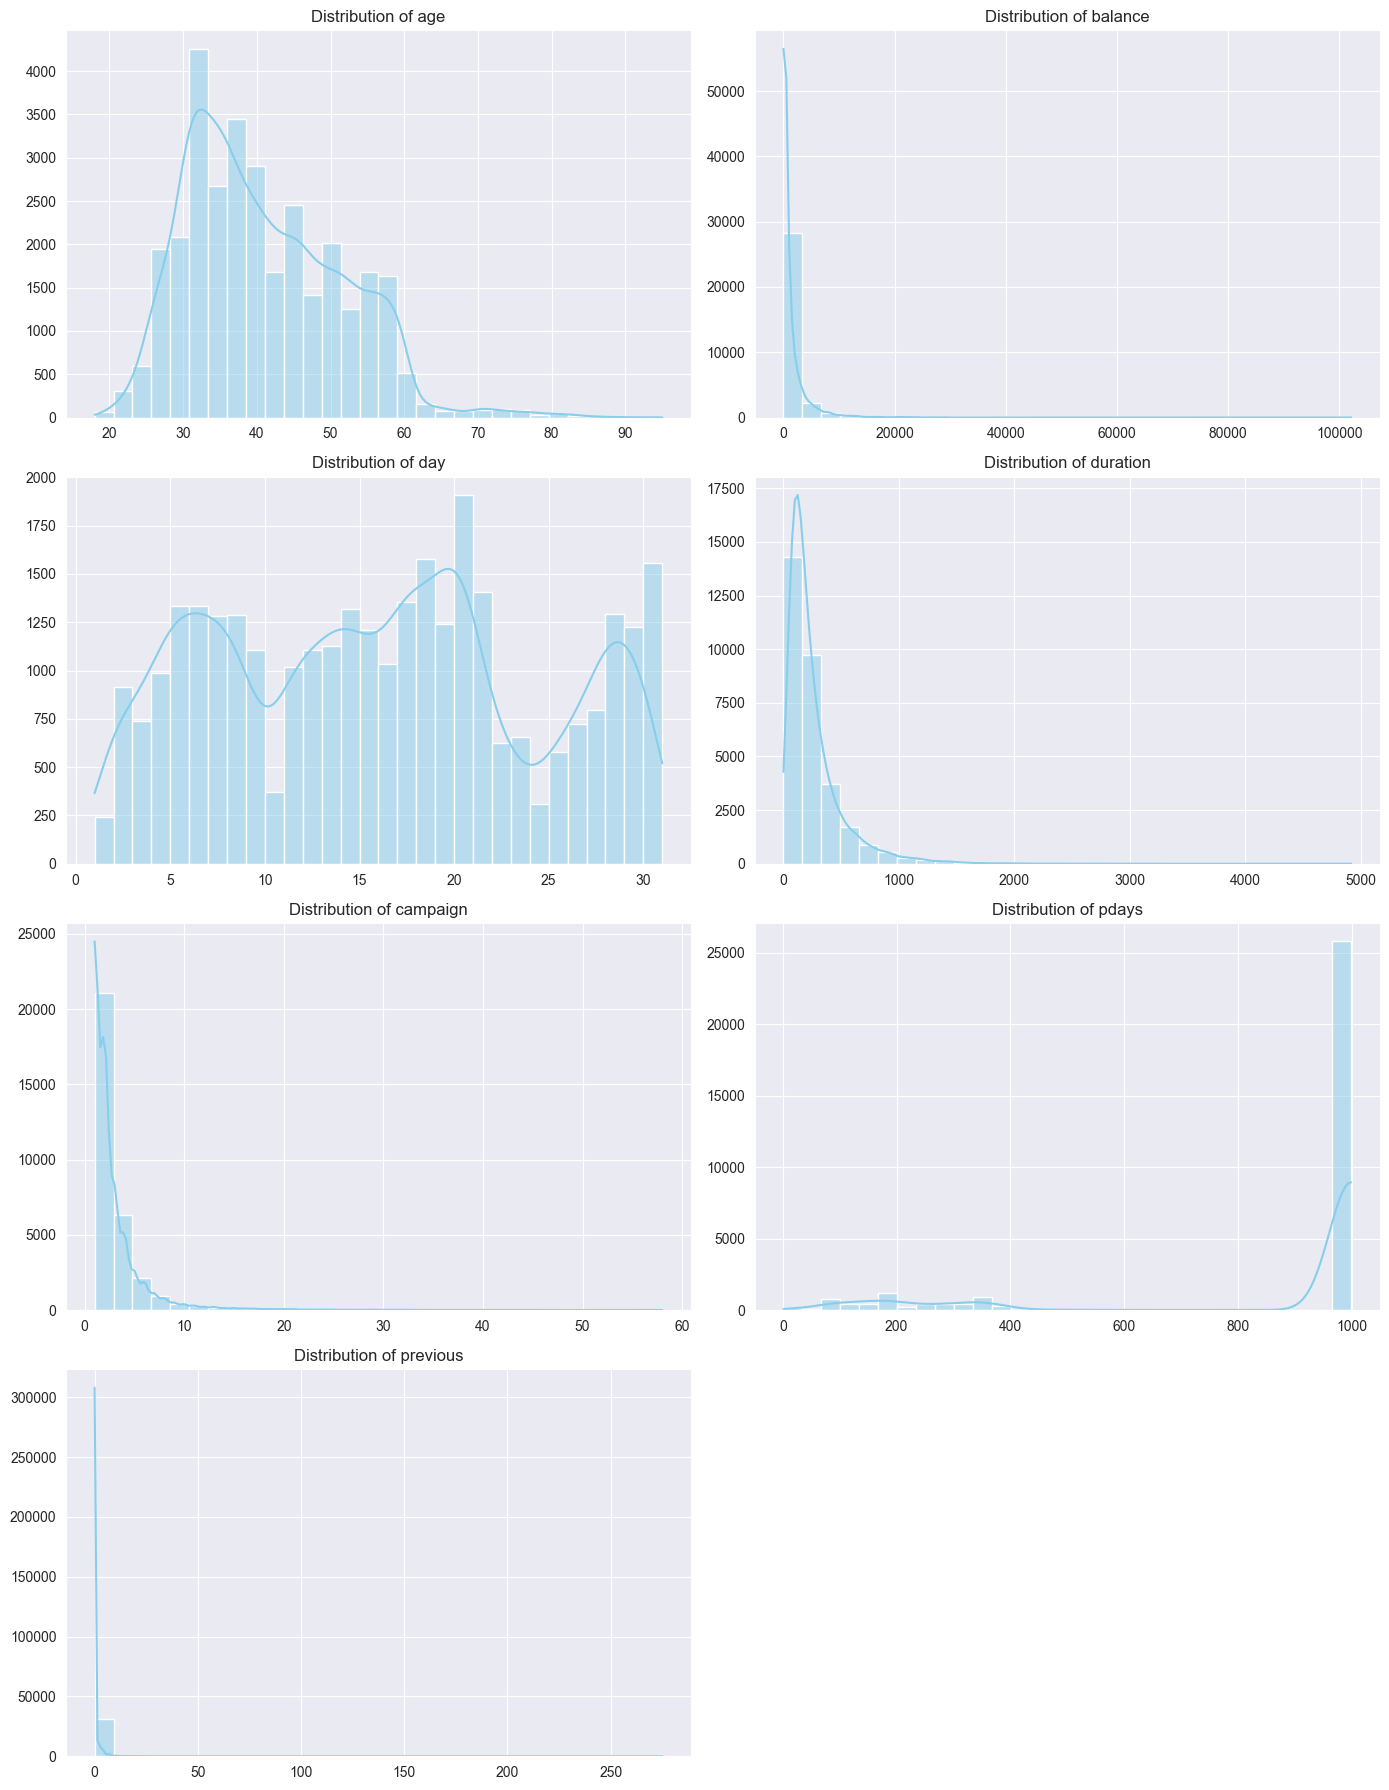

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a grid for plotting
plt.figure(figsize=(14, 18))

# Loop through continuous variables and create subplots
for i, col in enumerate(cont_vars):
    plt.subplot(len(cont_vars) // 2 + 1, 2, i + 1)
    sns.histplot(train_data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


##  Continuous Variable Distribution Observations

- **Most continuous variables are not normally distributed**, with the exception of **`age`**, which is roughly unimodal and somewhat close to a normal distribution, though slightly skewed to the right.

- **`balance`**, **`campaign`**, and **`previous`** are all **highly right-skewed**:
  - **`balance`** has many low or zero values and a long tail of extremely high values, which could affect model training and may require transformation or scaling.
  - **`campaign`** shows that most clients were contacted only a few times, with very few receiving 10 or more follow-ups.
  - **`previous`** is extremely skewed, indicating that the vast majority of clients had **not been contacted before**, or had very few prior contacts.

- **`day`** (representing the day of the month the contact occurred) appears **uniformly distributed**, with no clear pattern — suggesting this variable may not carry strong predictive signal unless paired with other time-based features like `month`.

- Overall, these skewed distributions suggest that some continuous variables may benefit from **log transformation**, **scaling**, or **binning** during preprocessing to reduce the effect of outliers and improve model performance.

###  Boxplots for Continuous Variables

To further understand the distribution and detect potential **outliers**, we’ll now plot boxplots for each continuous variable. This can help us visually identify:

- Presence of extreme values
- Spread and central tendency
- Skewness

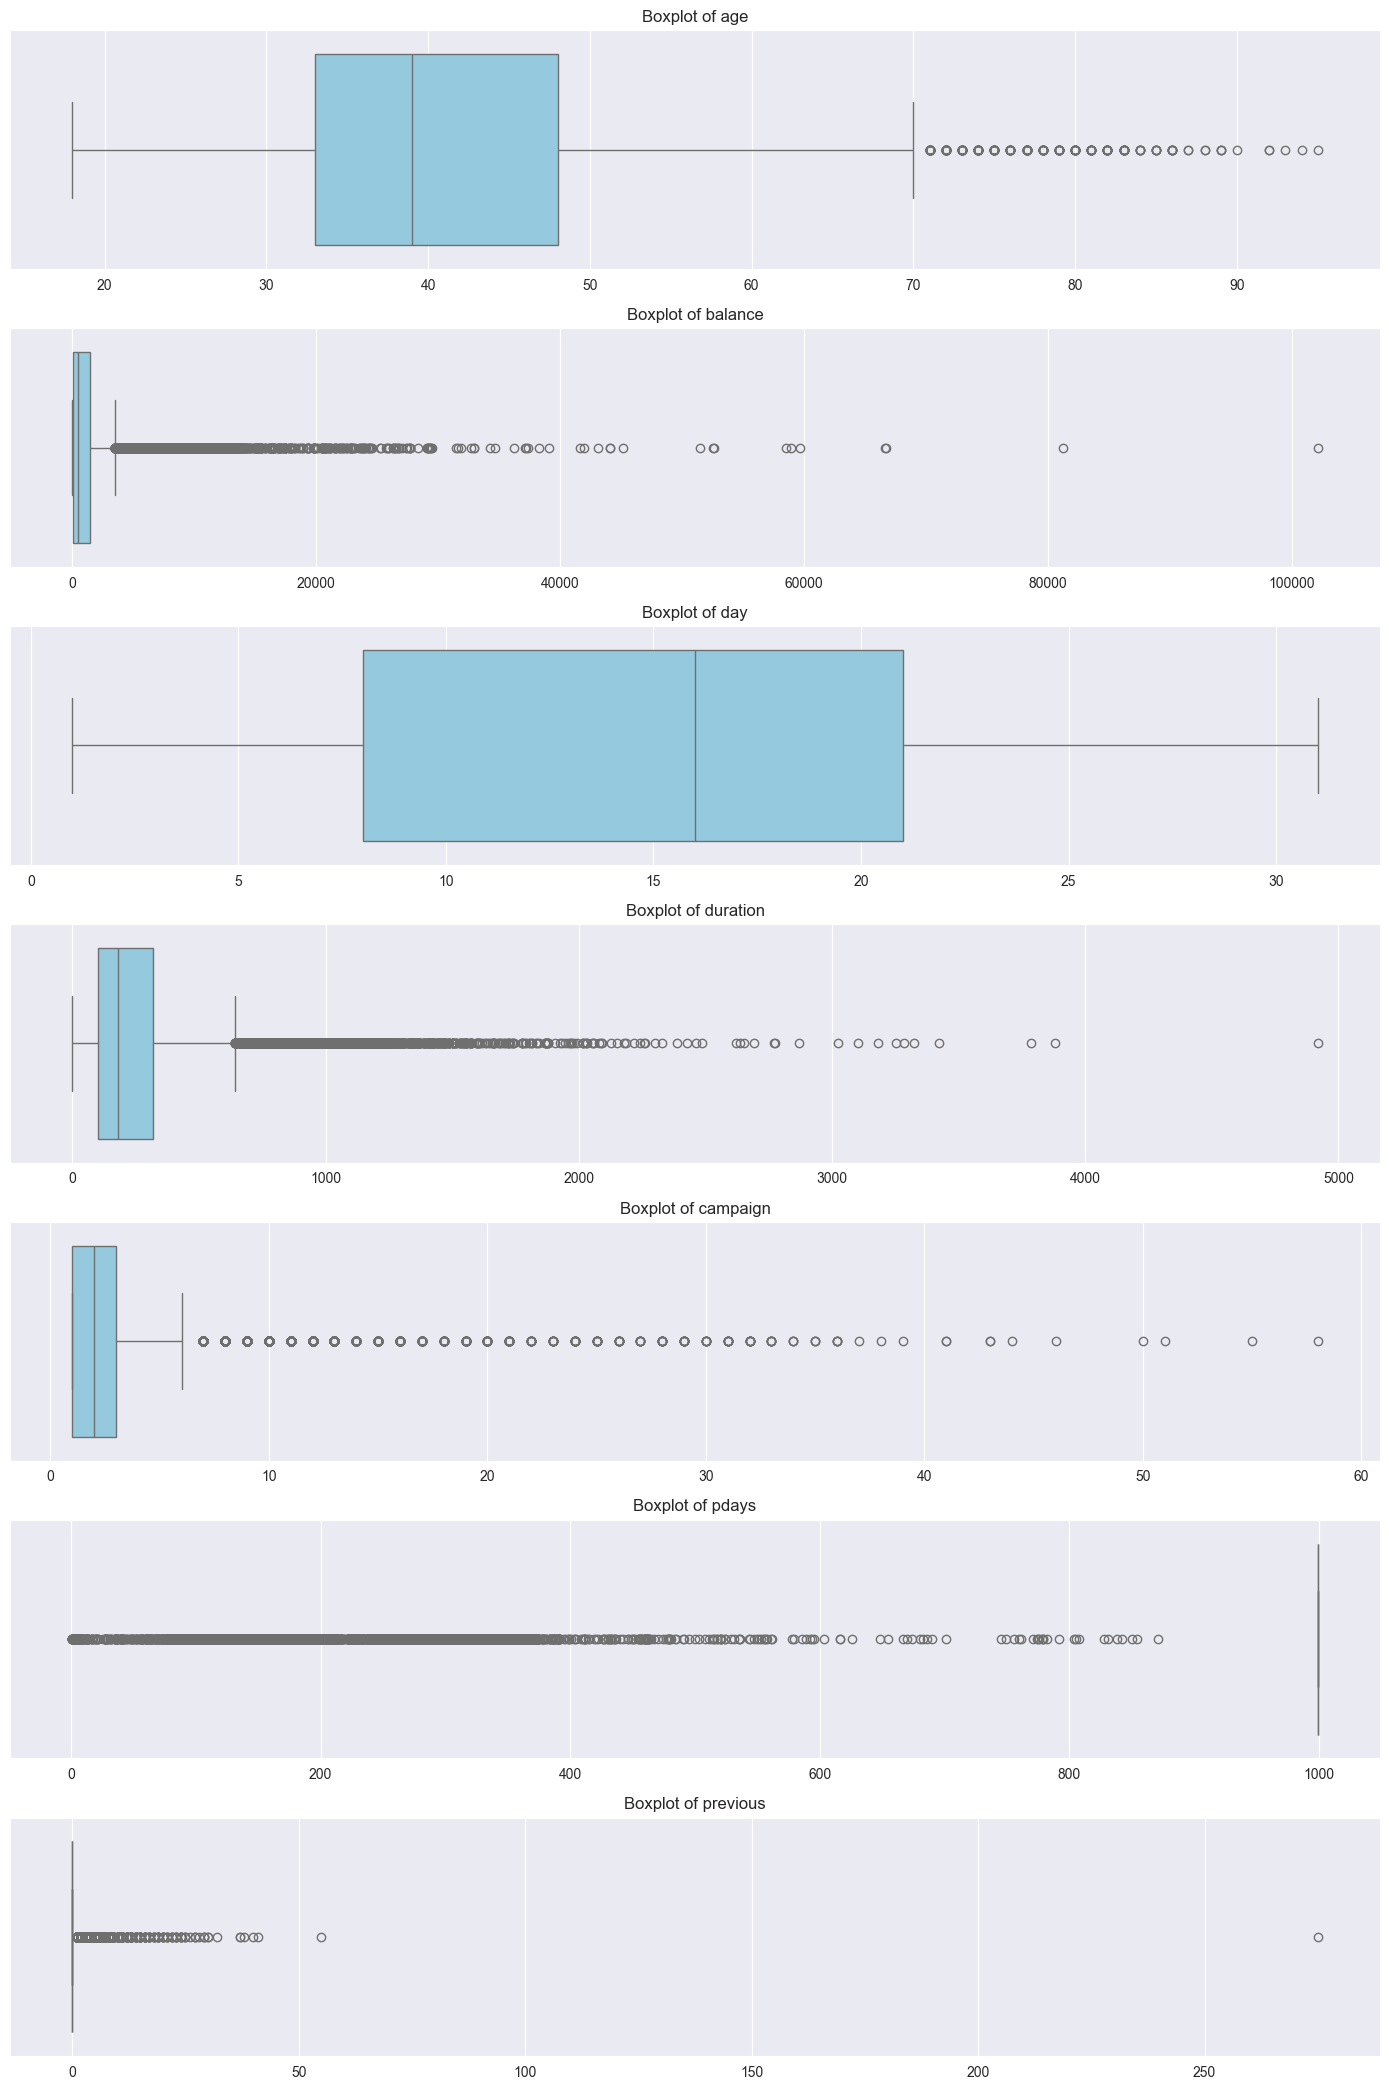

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and style
plt.figure(figsize=(14, len(cont_vars) * 3))
sns.set_style("darkgrid")

# Loop through continuous variables and create subplots
for i, col in enumerate(cont_vars):
    plt.subplot(len(cont_vars), 1, i + 1)
    sns.boxplot(x=train_data[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

##  Continuous Variable Boxplot Observations

- **Age**: The distribution is fairly compact and symmetric up to around age 70, after which we start to see a steady increase in outliers. This supports earlier observations that while age is relatively well-distributed, older age groups are rarer and may require careful handling.

- **Balance**: There are a large number of extreme outliers. While most balances are tightly packed around zero or slightly positive, some values exceed 100,000 — these may need to be scaled or transformed (e.g., log or winsorization) to avoid skewing models.

- **Day**: The distribution appears flat and even, without noticeable outliers. This is expected as it simply represents the day of the month the contact was made. It is likely not highly predictive on its own.

- **Campaign**: This variable shows a high concentration of data at the lower end, with a long right tail of outliers. Most clients were contacted fewer than 5 times, but some were contacted over 50 times. It may be helpful to **bin** or **cap** this variable to reduce skew.

- **Previous**: The vast majority of values are zero, with a small number of significant outliers. Like `campaign`, this may be more interpretable as a **categorical/bin flag** — especially since many clients were never previously contacted.

---

Overall, most continuous variables are **right-skewed** with several **high-value outliers**. These may require transformation or binning to improve model performance and stability.


##  Age Scatter Plots

The variable **`age`** has one of the largest ranges and most unique values among all features. To explore how it interacts with other continuous variables, we'll generate scatter plots of `age` against each of them.

These plots will also include color coding for the target variable **`y`**, helping us visually assess if there’s any relationship between age, other variables, and the likelihood of a positive campaign outcome.


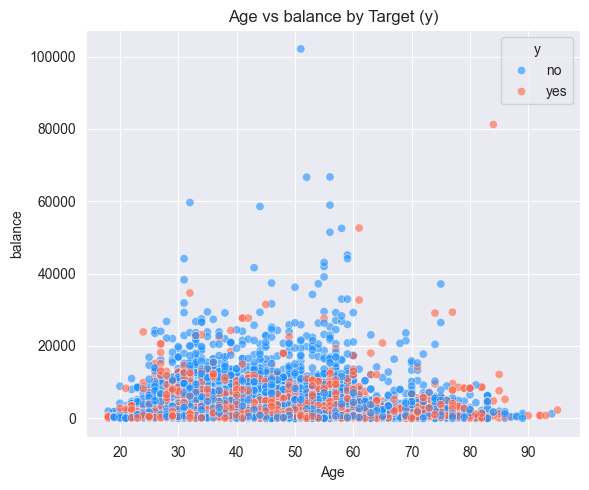

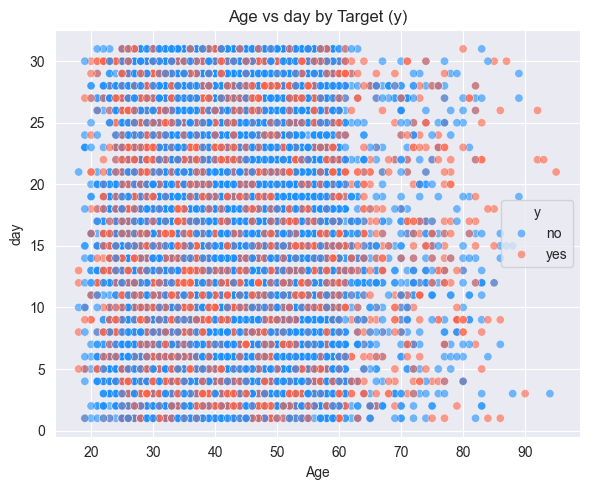

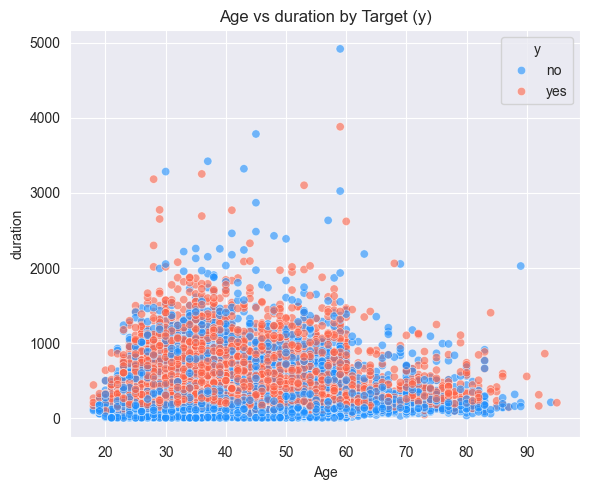

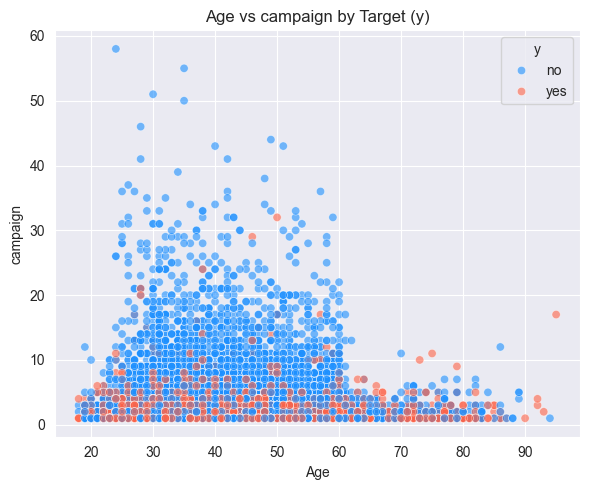

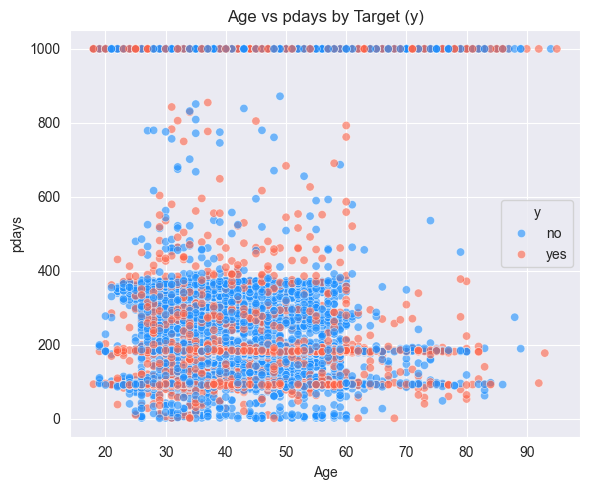

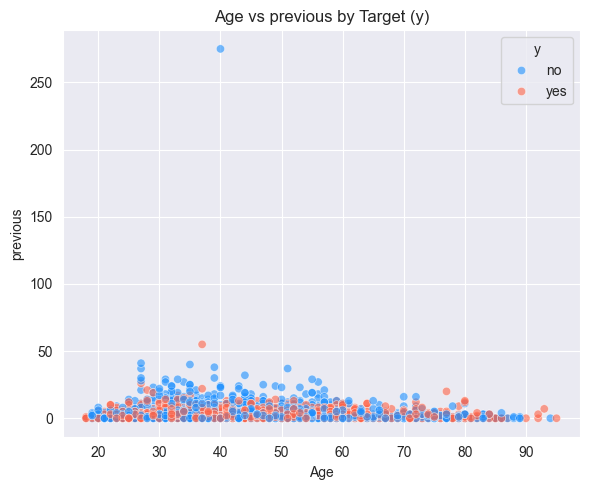

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom palette for 0 and 1
palette = {0: 'dodgerblue', 1: 'tomato'}

# Loop through continuous variables (excluding age itself)
for col in cont_vars:
    if col != 'age':
        plt.figure(figsize=(6, 5))
        ax = sns.scatterplot(data=train_data, x='age', y=col, hue='y', palette=palette, alpha=0.6)
        plt.title(f'Age vs {col} by Target (y)')
        plt.xlabel('Age')
        plt.ylabel(col)

        # Custom legend labels
        handles, labels = ax.get_legend_handles_labels()
        labels = ['no', 'yes']
        plt.legend(handles=handles, labels=labels, title='y')

        plt.tight_layout()
        plt.show()
        

###  Age vs Continuous Variable Scatter Plot Observations

- **Age vs Balance**: There is a broad spread of balance across all age groups, with most points tightly clustered near the lower range. A few high-balance outliers are seen in older clients, but no strong relationship with conversion (`y = 1`) is apparent. Subscriptions seem fairly distributed across different balances and ages.

- **Age vs Day**: No visible trend or structure. Since `day` refers to the day of the month the call was made, this lack of correlation is expected. Campaign success appears independent of the specific day contacted.

- **Age vs Campaign**: The majority of clients were contacted fewer than 10 times, particularly younger individuals. There’s a faint concentration of successful conversions (`y = 1`) among those contacted fewer times, suggesting over-contacting may reduce campaign effectiveness — especially in middle-aged groups.

- **Age vs Previous**: Most customers had 0 or very few previous contacts. A small cluster of successes is visible at low values, while those contacted many times did not necessarily convert. This supports the earlier decision to engineer a binary "was previously contacted" flag.

---

Overall, these scatter plots confirm that **age has weak visual correlations** with most numeric variables, and that **extreme values or frequent contacts don't guarantee conversions**. More meaningful insights may emerge after transformation or modeling.


##  Correlation Matrix of Continuous Variables

To better understand how our continuous variables relate to one another and to the target variable `y`, we create a correlation matrix using Pearson's correlation coefficient.

This heatmap helps to:

- Identify **strong linear relationships** between features
- Spot potential **redundant features** due to multicollinearity
- Highlight **features that are more correlated with the target** variable (`y`)

We’ll focus on the remaining continuous variables after dropping or transforming `duration` and `pdays`.


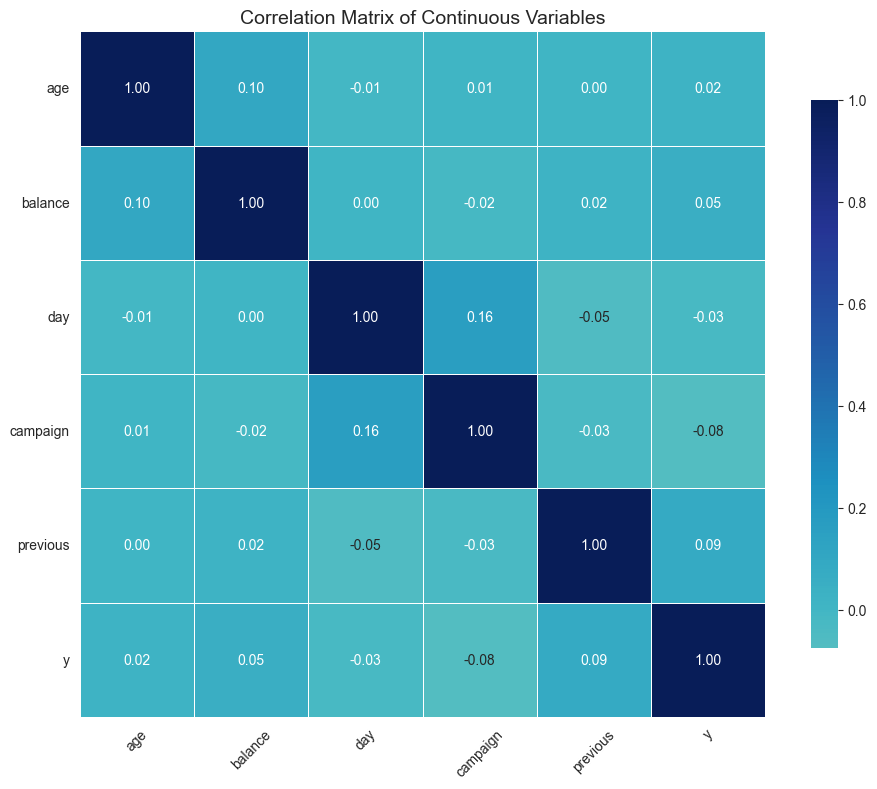

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fix font issue and use clear title text
plt.figure(figsize=(10, 8))

# Filter continuous variables again if needed
cont_vars_filtered = [col for col in cont_vars if col not in ['duration', 'pdays']]
corr_matrix = train_data[cont_vars_filtered + ['y']].corr()

# Plot updated heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='YlGnBu', center=0,
            linewidths=0.5, linecolor='white', square=True, cbar_kws={'shrink': .8})

plt.title('Correlation Matrix of Continuous Variables', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


###  Observations: Correlation Matrix of Continuous Variables

-  **No strong correlations** are observed between any pair of continuous variables, indicating a **low risk of multicollinearity** in modeling.
-  The **highest correlation** is between `day` and `campaign` (0.16), which is still relatively weak.
-  The target variable `y` has **weak positive correlations** with `previous` (0.09) and `balance` (0.05), and very low or negative correlations with others like `campaign` (-0.08) and `day` (-0.03).
-  Variables such as `age`, `day`, and `campaign` show **negligible linear relationships** with other continuous variables.

> Overall, this correlation matrix confirms that all continuous variables are **suitable for inclusion in modeling** without the need to drop or merge due to high correlation.


##  Feature Scaling with MinMaxScaler

To ensure that all continuous variables are on a similar scale, we applied **Min-Max Scaling** to the training and test datasets. This transformation scales each feature to a [0, 1] range, which is especially useful for distance-based models and helps stabilize the training process for tree-based models.


In [74]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test data
train_data[cont_vars] = scaler.fit_transform(train_data[cont_vars])
test_data[cont_vars] = scaler.transform(test_data[cont_vars])

# Display the scaled data
print(train_data[cont_vars].head())
print(test_data[cont_vars].head())

        age   balance       day  duration  campaign  pdays  previous
0  0.519481  0.020984  0.133333  0.053070       0.0    1.0       0.0
1  0.337662  0.000284  0.133333  0.030704       0.0    1.0       0.0
2  0.194805  0.000020  0.133333  0.015453       0.0    1.0       0.0
3  0.376623  0.014746  0.133333  0.018707       0.0    1.0       0.0
4  0.194805  0.000010  0.133333  0.040260       0.0    1.0       0.0
        age   balance       day  duration  campaign  pdays  previous
0  0.142857  0.003819  0.133333  0.027857       0.0    1.0       0.0
1  0.519481  0.000695  0.133333  0.014437       0.0    1.0       0.0
2  0.506494  0.001586  0.133333  0.035380       0.0    1.0       0.0
3  0.181818  0.000225  0.133333  0.032534       0.0    1.0       0.0
4  0.090909  0.000490  0.133333  0.069540       0.0    1.0       0.0


In [75]:
train_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,was_previously_contacted,has_negative_balance
0,0.519481,management,married,tertiary,no,0.020984,yes,no,unknown,0.133333,may,0.053070,0.000000,1.000000,0.000000,unknown,0,0,0
1,0.337662,technician,single,secondary,no,0.000284,yes,no,unknown,0.133333,may,0.030704,0.000000,1.000000,0.000000,unknown,0,0,0
2,0.194805,entrepreneur,married,secondary,no,0.000020,yes,yes,unknown,0.133333,may,0.015453,0.000000,1.000000,0.000000,unknown,0,0,0
3,0.376623,blue-collar,married,Other,no,0.014746,yes,no,unknown,0.133333,may,0.018707,0.000000,1.000000,0.000000,unknown,0,0,0
4,0.194805,Other,single,Other,no,0.000010,no,no,unknown,0.133333,may,0.040260,0.000000,1.000000,0.000000,unknown,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31644,0.428571,technician,married,tertiary,no,0.008078,no,no,cellular,0.533333,nov,0.198658,0.035088,1.000000,0.000000,unknown,1,0,0
31645,0.688312,retired,divorced,primary,no,0.016930,no,no,cellular,0.533333,nov,0.092721,0.017544,1.000000,0.000000,unknown,1,0,0
31646,0.701299,retired,married,secondary,no,0.055960,no,no,cellular,0.533333,nov,0.229158,0.070175,0.183367,0.010909,success,1,1,0
31647,0.506494,blue-collar,married,secondary,no,0.006541,no,no,telephone,0.533333,nov,0.103294,0.052632,1.000000,0.000000,unknown,0,0,0


In [76]:
test_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,was_previously_contacted,has_negative_balance
0,0.142857,admin.,single,secondary,no,0.003819,yes,no,unknown,0.133333,may,0.027857,0.000000,1.000000,0.000000,unknown,0,0,0
1,0.519481,technician,married,Other,no,0.000695,yes,no,unknown,0.133333,may,0.014437,0.000000,1.000000,0.000000,unknown,0,0,0
2,0.506494,services,married,secondary,no,0.001586,yes,no,unknown,0.133333,may,0.035380,0.000000,1.000000,0.000000,unknown,0,0,0
3,0.181818,blue-collar,single,primary,no,0.000225,yes,yes,unknown,0.133333,may,0.032534,0.000000,1.000000,0.000000,unknown,0,0,0
4,0.090909,services,married,secondary,no,0.000490,yes,no,unknown,0.133333,may,0.069540,0.000000,1.000000,0.000000,unknown,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13557,0.129870,self-employed,single,tertiary,no,0.001557,no,no,cellular,0.500000,nov,0.091297,0.017544,0.032064,0.014545,success,1,1,0
13558,0.649351,retired,married,secondary,no,0.011221,no,no,cellular,0.500000,nov,0.043107,0.000000,0.186373,0.021818,success,1,1,0
13559,0.207792,blue-collar,single,secondary,no,0.014443,yes,no,cellular,0.500000,nov,0.237088,0.035088,0.530060,0.043636,other,0,1,0
13560,0.259740,technician,married,secondary,no,0.005454,yes,no,cellular,0.500000,nov,0.316389,0.052632,1.000000,0.000000,unknown,1,0,0


##  One-Hot Encoding and Final Dataset Assembly

We applied **One-Hot Encoding** to the categorical features in both the training and test datasets to convert them into numerical format. To ensure consistency between train and test sets, we used `.align()` with `join='outer'`, filling any missing columns with zeros.

Finally, we merged the **scaled continuous variables** with the **encoded categorical variables** to form the complete feature matrices for model training and evaluation.


In [77]:
# One-hot encode categorical data
cat_data_encoded = pd.get_dummies(cat_data, drop_first=True)
cat_data_test_encoded = pd.get_dummies(cat_data_test, drop_first=True)

# Ensure both train and test have the same columns after encoding
cat_data_encoded, cat_data_test_encoded = cat_data_encoded.align(cat_data_test_encoded, join='outer', axis=1, fill_value=0)

# Merge with normalized continuous data
train_data_final = pd.concat([train_data[cont_vars], cat_data_encoded], axis=1)
test_data_final = pd.concat([test_data[cont_vars], cat_data_test_encoded], axis=1)

# Display the final datasets
print(train_data_final.head())
print(test_data_final.head())

        age   balance       day  duration  campaign  pdays  previous  y  \
0  0.519481  0.020984  0.133333  0.053070       0.0    1.0       0.0  0   
1  0.337662  0.000284  0.133333  0.030704       0.0    1.0       0.0  0   
2  0.194805  0.000020  0.133333  0.015453       0.0    1.0       0.0  0   
3  0.376623  0.014746  0.133333  0.018707       0.0    1.0       0.0  0   
4  0.194805  0.000010  0.133333  0.040260       0.0    1.0       0.0  0   

   job_admin.  job_blue-collar  ...  month_jul  month_jun  month_mar  \
0       False            False  ...      False      False      False   
1       False            False  ...      False      False      False   
2       False            False  ...      False      False      False   
3       False             True  ...      False      False      False   
4       False            False  ...      False      False      False   

   month_may  month_nov  month_oct  month_sep  poutcome_other  \
0       True      False      False      False      

In [78]:
train_data_final

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0.020984,0.133333,0.053070,0.000000,1.000000,0.000000,0,False,False,...,False,False,False,True,False,False,False,False,False,True
1,0.337662,0.000284,0.133333,0.030704,0.000000,1.000000,0.000000,0,False,False,...,False,False,False,True,False,False,False,False,False,True
2,0.194805,0.000020,0.133333,0.015453,0.000000,1.000000,0.000000,0,False,False,...,False,False,False,True,False,False,False,False,False,True
3,0.376623,0.014746,0.133333,0.018707,0.000000,1.000000,0.000000,0,False,True,...,False,False,False,True,False,False,False,False,False,True
4,0.194805,0.000010,0.133333,0.040260,0.000000,1.000000,0.000000,0,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31644,0.428571,0.008078,0.533333,0.198658,0.035088,1.000000,0.000000,1,False,False,...,False,False,False,False,True,False,False,False,False,True
31645,0.688312,0.016930,0.533333,0.092721,0.017544,1.000000,0.000000,1,False,False,...,False,False,False,False,True,False,False,False,False,True
31646,0.701299,0.055960,0.533333,0.229158,0.070175,0.183367,0.010909,1,False,False,...,False,False,False,False,True,False,False,False,True,False
31647,0.506494,0.006541,0.533333,0.103294,0.052632,1.000000,0.000000,0,False,True,...,False,False,False,False,True,False,False,False,False,True


In [79]:
test_data_final

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0.142857,0.003819,0.133333,0.027857,0.000000,1.000000,0.000000,0,True,False,...,False,False,False,True,False,False,False,False,False,True
1,0.519481,0.000695,0.133333,0.014437,0.000000,1.000000,0.000000,0,False,False,...,False,False,False,True,False,False,False,False,False,True
2,0.506494,0.001586,0.133333,0.035380,0.000000,1.000000,0.000000,0,False,False,...,False,False,False,True,False,False,False,False,False,True
3,0.181818,0.000225,0.133333,0.032534,0.000000,1.000000,0.000000,0,False,True,...,False,False,False,True,False,False,False,False,False,True
4,0.090909,0.000490,0.133333,0.069540,0.000000,1.000000,0.000000,0,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13557,0.129870,0.001557,0.500000,0.091297,0.017544,0.032064,0.014545,1,False,False,...,False,False,False,False,True,False,False,False,True,False
13558,0.649351,0.011221,0.500000,0.043107,0.000000,0.186373,0.021818,1,False,False,...,False,False,False,False,True,False,False,False,True,False
13559,0.207792,0.014443,0.500000,0.237088,0.035088,0.530060,0.043636,0,False,True,...,False,False,False,False,True,False,False,True,False,False
13560,0.259740,0.005454,0.500000,0.316389,0.052632,1.000000,0.000000,1,False,False,...,False,False,False,False,True,False,False,False,False,True


##  Decision Tree Classification and Evaluation

We trained a **Decision Tree Classifier** using entropy as the splitting criterion and applied `class_weight='balanced'` to address class imbalance.

Evaluation was conducted on both the **training** and **test datasets**, and key metrics like **Accuracy, Precision, Recall, F1 Score**, and **ROC AUC** were calculated.

An **ROC Curve** was also plotted to visualize the model’s ability to distinguish between the classes.

This comprehensive evaluation helps us understand whether the model is overfitting or generalizing well.


**Decision Tree Evaluation Summary:**

,Train,Test
Accuracy,1.0,0.8789
Precision,1.0,0.4814
Recall,1.0,0.4578
F1 Score,1.0,0.4693
ROC AUC,1.0,0.6962


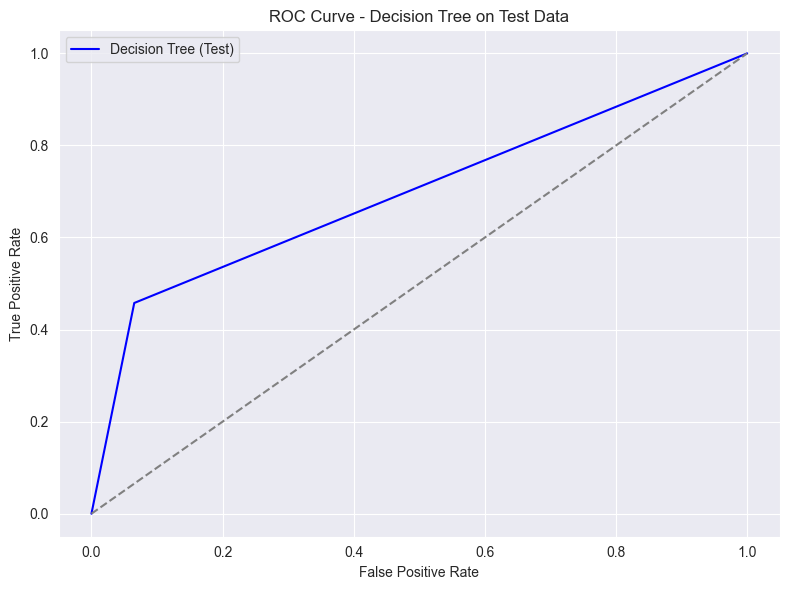

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# Prepare data
X_train = train_data_final.drop(columns='y')
y_train = train_data_final['y']
X_test = test_data_final.drop(columns='y')
y_test = test_data_final['y']

# 1. Train Decision Tree model
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42, class_weight='balanced')
dt_model.fit(X_train, y_train)

# 2. Predictions
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)
y_pred_dt_proba = dt_model.predict_proba(X_test)[:, 1]  #  Required for ROC curve and AUC

# 3. Evaluation Function
def evaluate_model_dt(y_true, y_pred, dataset=''):
    dt_accuracy = accuracy_score(y_true, y_pred)
    dt_precision = precision_score(y_true, y_pred)
    dt_recall = recall_score(y_true, y_pred)
    dt_f1 = f1_score(y_true, y_pred)
    dt_auc = roc_auc_score(y_true, y_pred)
    return pd.Series([dt_accuracy, dt_precision, dt_recall, dt_f1, dt_auc],
                     index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
                     name=dataset)

# 4. Evaluation Table
dt_results_df = pd.concat([
    evaluate_model_dt(y_train, y_train_pred_dt, 'Train'),
    evaluate_model_dt(y_test, y_test_pred_dt, 'Test')
], axis=1)

# 5. Display Evaluation Table
display(Markdown("**Decision Tree Evaluation Summary:**"))
display(dt_results_df.round(4))

# 6. ROC Curve (Test Set)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt_proba)
plt.figure(figsize=(8, 6))
sns.lineplot(x=fpr_dt, y=tpr_dt, label='Decision Tree (Test)', color='blue')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree on Test Data")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


###  Confusion Matrix

To further evaluate the performance of the Decision Tree model, we plot the **confusion matrix**. This visualization helps us understand the distribution of **true positives, true negatives, false positives, and false negatives**, giving deeper insight into where the model performs well and where it may be misclassifying.


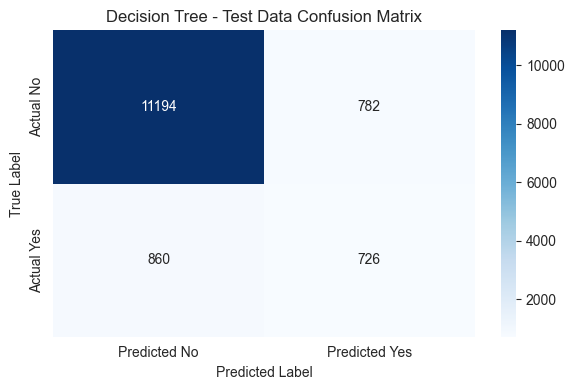

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

def plot_conf_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted No', 'Predicted Yes'],
                yticklabels=['Actual No', 'Actual Yes'])
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Example usage for test data:
plot_conf_matrix(y_test, y_test_pred_dt, title='Decision Tree - Test Data Confusion Matrix')

##  Decision Tree Model Evaluation Summary

###  Test Set Performance Overview
The Decision Tree model was trained on the full training set and evaluated on the test set. Below is the summary of key performance metrics:

| Metric       | Train | Test   |
|--------------|-------|--------|
| Accuracy     | 1.00  | 0.8789 |
| Precision    | 1.00  | 0.4814 |
| Recall       | 1.00  | 0.4578 |
| F1 Score     | 1.00  | 0.4693 |
| ROC AUC      | 1.00  | 0.6962 |

###  ROC Curve Observations
- The ROC curve shows a decent ability to distinguish between the classes with a **ROC AUC of 0.6962**.
- While not perfect, this indicates **better-than-random** classification performance.

###  Confusion Matrix Insights
The confusion matrix for the test set reveals:
-  **True Negatives (TN)**: 11,194 clients correctly predicted as *not subscribing*.
-  **True Positives (TP)**: 726 clients correctly predicted as *subscribing*.
-  **False Positives (FP)**: 782 clients incorrectly predicted as *subscribing*.
-  **False Negatives (FN)**: 860 clients incorrectly predicted as *not subscribing*.

###  Evaluation Notes
- The model **perfectly memorizes the training data**, suggesting **overfitting**.
- On the test set, while the **accuracy is quite high (87.89%)**, the **precision and recall are modest**, especially for the minority class.
- The model is better at identifying clients who do **not subscribe**, but has room to improve in detecting actual conversions.
- **F1 Score** (0.4693) reflects the imbalance in the prediction quality between classes.

###  Conclusion
- This Decision Tree model demonstrates **strong performance on the training set** but **moderate generalization** on unseen data.
- Given the overfitting and recall issues, this model may not be ideal for deployment.
- Further **model tuning** or trying **ensemble techniques** like **Random Forest** or **XGBoost** could significantly enhance performance, especially in identifying *yes* class correctly.


##  Random Forest Classification and Evaluation

We trained a **Random Forest Classifier** using entropy as the splitting criterion and applied `class_weight='balanced'` to address class imbalance.

Evaluation was conducted on both the **training** and **test datasets**, and key metrics like **Accuracy, Precision, Recall, F1 Score**, and **ROC AUC** were calculated.

An **ROC Curve** was also plotted to visualize the model’s ability to distinguish between the classes.

This comprehensive evaluation helps us understand whether the model is overfitting or generalizing well.

📊 **Random Forest Evaluation Summary:**

,Train,Test
Accuracy,1.0,0.902890
Precision,1.0,0.674449
Recall,1.0,0.327869
F1 Score,1.0,0.441239
ROC AUC,1.0,0.932867


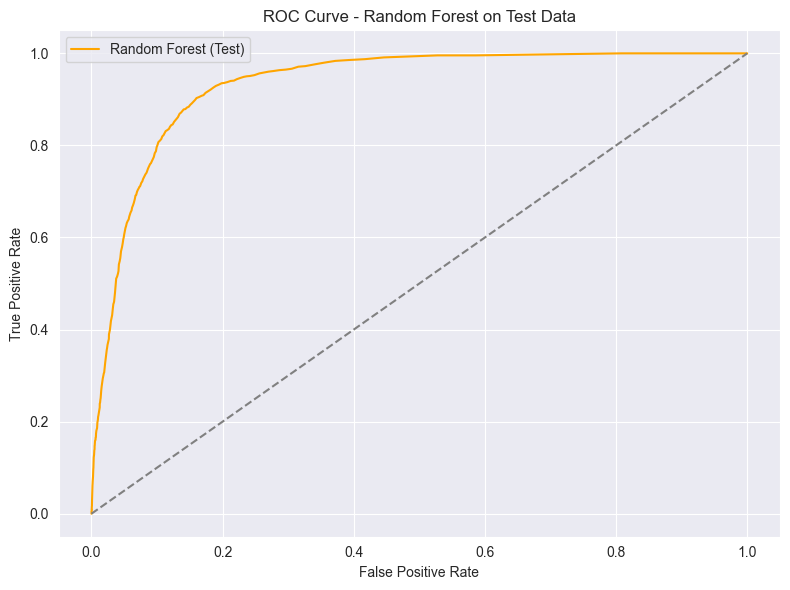

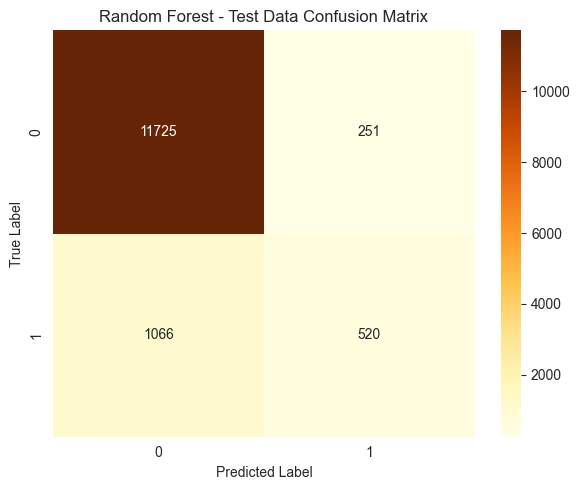

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display, Markdown

# 1. Train Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=300,
    criterion='entropy',
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train, y_train)

# 2. Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

# 3. Evaluation Metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_pred_rf_proba)

# 4. Evaluation Table
rf_eval_df = pd.DataFrame({
    'Train': [
        accuracy_score(y_train, rf_model.predict(X_train)),
        precision_score(y_train, rf_model.predict(X_train)),
        recall_score(y_train, rf_model.predict(X_train)),
        f1_score(y_train, rf_model.predict(X_train)),
        roc_auc_score(y_train, rf_model.predict_proba(X_train)[:, 1])
    ],
    'Test': [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_auc]
}, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

# 5. Display Evaluation Table
display(Markdown("📊 **Random Forest Evaluation Summary:**"))
display(rf_eval_df)

# 6. ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (Test)', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve - Random Forest on Test Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Confusion Matrix
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='YlOrBr')
plt.title("Random Forest - Test Data Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


##  Random Forest Model Evaluation Notes

###  Performance Summary:
- **Training Metrics** all show **perfect scores** (Accuracy, Precision, Recall, F1, and ROC AUC = 1.0), which is a strong signal of **overfitting**.
- On the **test set**, the model achieves a **high accuracy of ~90.3%** and an **excellent ROC AUC of 0.93**, indicating strong ability to rank positive vs. negative cases.
- However, **precision (0.67)** is much higher than **recall (0.33)**, meaning the model is better at correctly predicting the positive class when it does predict it, but it **misses many actual positives**.

###  Confusion Matrix Insights:
- The model **correctly predicted 11725 'no' responses** and **520 'yes' responses**, but **misclassified 1066 'yes' cases as 'no'**, which contributes to the lower recall.
- Only **251 'no' cases were falsely predicted as 'yes'**, suggesting the model is conservative in predicting the positive class.

###  ROC Curve Highlights:
- The ROC curve bows prominently toward the top-left, confirming **good discrimination ability** between classes.
- AUC score of **0.93** reflects **excellent model performance** in ranking true positives higher than false positives.


##  XGBoost Model

XGBoost (Extreme Gradient Boosting) is a powerful ensemble algorithm based on gradient boosting trees. It is known for:

- High **predictive performance** and **speed**.
- Built-in handling for **imbalanced classes** using `scale_pos_weight`.
- Regularization (`lambda`, `alpha`) that helps avoid overfitting.

In this section, we trained XGBoost using optimized parameters and evaluated it across multiple metrics including accuracy, precision, recall, F1 score, and ROC AUC. The performance is assessed on both training and test datasets to gauge generalization ability. Additionally, we visualize the ROC curve and confusion matrix to analyze model behavior.


C:\Users\MR.SARIM\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:07:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


**XGBoost Evaluation Summary:**

,Train,Test
Accuracy,0.9389,0.9083
Precision,0.7076,0.5969
Recall,0.8142,0.6658
F1 Score,0.7572,0.6295
ROC AUC,0.9736,0.9347


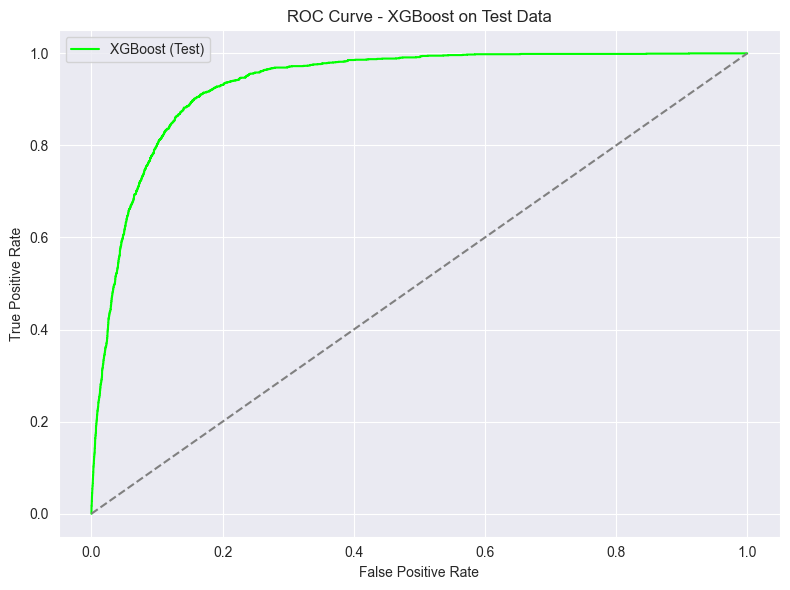

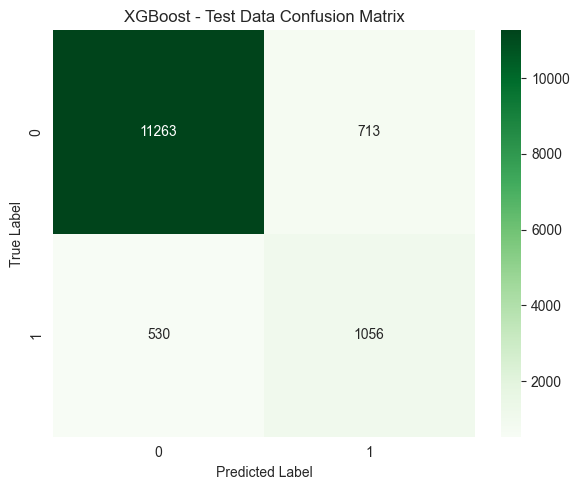

In [83]:
# 1. Import Libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 2. Train XGBoost Model
xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=5, use_label_encoder=False,
                          eval_metric='logloss', random_state=42, scale_pos_weight=2)
xgb_model.fit(X_train, y_train)

# 3. Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

# 4. Evaluation Metrics
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)
xgb_auc = roc_auc_score(y_test, y_pred_xgb_proba)

# 5. Evaluation Table
xgb_eval_df = pd.DataFrame({
    'Train': [accuracy_score(y_train, xgb_model.predict(X_train)),
              precision_score(y_train, xgb_model.predict(X_train)),
              recall_score(y_train, xgb_model.predict(X_train)),
              f1_score(y_train, xgb_model.predict(X_train)),
              roc_auc_score(y_train, xgb_model.predict_proba(X_train)[:, 1])],
    'Test': [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1, xgb_auc]
}, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

# Display Evaluation Table
from IPython.display import display, Markdown
display(Markdown("**XGBoost Evaluation Summary:**"))
display(xgb_eval_df.round(4))

# 6. ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (Test)', color='lime')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve - XGBoost on Test Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Confusion Matrix
conf_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat_xgb, annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost - Test Data Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


##  XGBoost Evaluation Summary

###  Performance Highlights

- **Train vs Test Metrics** reveal a balanced and high-performing model:
  - **Accuracy** on test data is **90.8%**, closely aligning with training accuracy (93.8%), suggesting minimal overfitting.
  - **Precision (0.5969)** and **Recall (0.6658)** indicate a strong ability to identify positive (subscribed) cases with relatively fewer false positives and false negatives compared to other models.
  - The **F1 Score (0.6295)** balances both precision and recall well — the best so far among the models evaluated.
  - **ROC AUC** of **0.9347** on test data confirms excellent classification performance and discriminative power.

###  ROC Curve Interpretation

- The ROC curve demonstrates a sharp rise towards the top-left corner, showing that the model maintains high true positive rates across different thresholds with low false positive rates — a strong sign of model robustness.

###  Confusion Matrix Insights

- **True Positives (1056)** and **True Negatives (11263)** are significantly high.
- **False Positives (713)** and **False Negatives (530)** are relatively low, confirming the model's balance in handling both classes.
- Notably, XGBoost correctly identifies more actual 'yes' cases compared to Decision Tree and Random Forest, which had lower recall.

---



##  Logistic Regression Model

Logistic Regression is a **linear classification algorithm** that models the probability of a binary outcome using the **logit function**. It’s **interpretable**, performs well with **linearly separable** data, and is often used as a **baseline model** in binary classification tasks.


**Logistic Regression Evaluation Summary:**

,Train,Test
Accuracy,0.8433,0.8499
Precision,0.4145,0.4260
Recall,0.8218,0.8146
F1 Score,0.5511,0.5594
ROC AUC,0.9086,0.9117


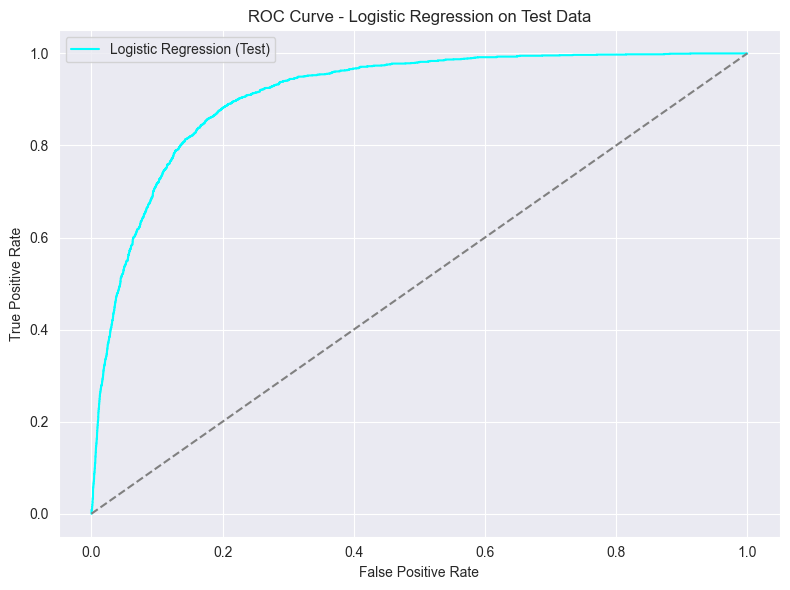

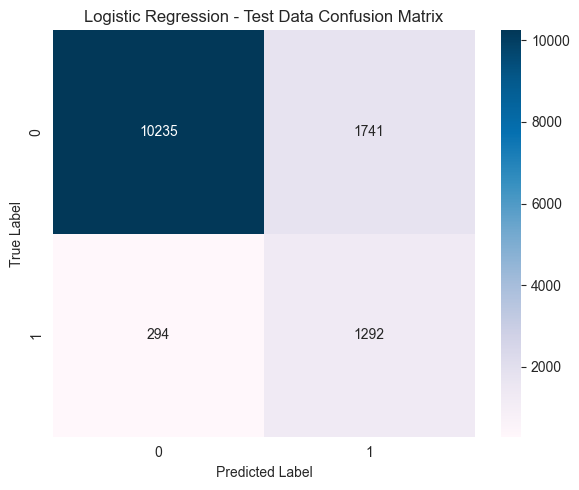

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Train Logistic Regression Model
logreg_model = LogisticRegression(penalty='l2', solver='liblinear', class_weight='balanced', random_state=42)
logreg_model.fit(X_train, y_train)

# 2. Predictions
y_pred_logreg = logreg_model.predict(X_test)
y_pred_logreg_proba = logreg_model.predict_proba(X_test)[:, 1]

# 3. Evaluation Metrics
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_precision = precision_score(y_test, y_pred_logreg)
logreg_recall = recall_score(y_test, y_pred_logreg)
logreg_f1 = f1_score(y_test, y_pred_logreg)
logreg_auc = roc_auc_score(y_test, y_pred_logreg_proba)

# 4. Evaluation Table
logreg_eval_df = pd.DataFrame({
    'Train': [
        accuracy_score(y_train, logreg_model.predict(X_train)),
        precision_score(y_train, logreg_model.predict(X_train)),
        recall_score(y_train, logreg_model.predict(X_train)),
        f1_score(y_train, logreg_model.predict(X_train)),
        roc_auc_score(y_train, logreg_model.predict_proba(X_train)[:, 1])
    ],
    'Test': [logreg_accuracy, logreg_precision, logreg_recall, logreg_f1, logreg_auc]
}, index=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

# Display Evaluation Table
from IPython.display import display, Markdown
display(Markdown("**Logistic Regression Evaluation Summary:**"))
display(logreg_eval_df.round(4))

# 5. ROC Curve
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_logreg_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression (Test)', color='cyan')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve - Logistic Regression on Test Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Confusion Matrix
conf_mat_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat_logreg, annot=True, fmt='d', cmap='PuBu')
plt.title("Logistic Regression - Test Data Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


##  Logistic Regression Evaluation Summary

###  Performance Overview
- The model achieved **~85% accuracy** on both training and test sets — indicating consistent performance and **no overfitting**.
- **Precision** is **low (0.426)**, meaning that many of the predicted "yes" labels are actually incorrect.
- **Recall is high (0.815)** — the model successfully captures a large number of actual subscribers, which is crucial in marketing.
- The **F1 Score (~0.56)** shows a fair balance between precision and recall.
- **ROC AUC is 0.91**, indicating strong model capability in distinguishing between the "yes" and "no" classes.

###  ROC Curve Interpretation
- The **ROC Curve** lies significantly above the diagonal baseline, confirming that the model performs **well above random guessing**.
- With a **True Positive Rate (TPR)** reaching ~0.8+ at low **False Positive Rates (FPR)**, the model demonstrates **excellent discrimination power**.
- The **Area Under the Curve (AUC)** score of **0.9117** further validates that the model can rank positive instances higher than negative ones in most cases.

###  Confusion Matrix Insights
- Correctly predicted:
  - **10,235 non-subscribers** (True Negatives)
  - **1,292 subscribers** (True Positives)
- Incorrectly predicted:
  - **1,741 non-subscribers as subscribers** (False Positives)
  - **294 subscribers as non-subscribers** (False Negatives)

##  Model Performance Comparison on Test Data

To evaluate the predictive performance of each machine learning model on the test set, we compared the following metrics across all four models:

- **Accuracy**: Overall correctness of predictions.
- **Precision**: Proportion of true positive predictions among all positive predictions.
- **Recall**: Ability to identify all positive cases.
- **F1 Score**: Harmonic mean of precision and recall — useful for imbalanced datasets.
- **ROC AUC**: Measures model's ability to distinguish between classes.

The table below summarizes the results:



In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Model Names
model_names = ['Decision Tree', 'Random Forest', 'XGBoost', 'Logistic Regression']

# Predictions and Probabilities on TEST set
predictions = [y_test_pred_dt, y_pred_rf, y_pred_xgb, y_pred_logreg]
probabilities = [y_pred_dt_proba, y_pred_rf_proba, y_pred_xgb_proba, y_pred_logreg_proba]

# 1. Evaluation Table Across All Models
comparison_metrics = []

for name, y_pred, y_proba in zip(model_names, predictions, probabilities):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)

    comparison_metrics.append([accuracy, precision, recall, f1, auc_score])

# Create DataFrame
comparison_df = pd.DataFrame(comparison_metrics,
                             columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
                             index=model_names)

# Display Table
display(Markdown("**All Models Evaluation Summary:**"))
display(comparison_df.round(4))


**All Models Evaluation Summary:**

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Decision Tree,0.8789,0.4814,0.4578,0.4693,0.6962
Random Forest,0.9029,0.6744,0.3279,0.4412,0.9329
XGBoost,0.9083,0.5969,0.6658,0.6295,0.9347
Logistic Regression,0.8499,0.4260,0.8146,0.5594,0.9117


###  Key Observations:

- **XGBoost** achieves the **highest overall accuracy (0.9083)** and **ROC AUC (0.9347)**, with strong balance across all metrics. It emerges as the **top-performing model**.
- **Random Forest** also performs well, especially in **precision (0.6744)** and ROC AUC, making it suitable when minimizing false positives is important.
- **Logistic Regression** stands out with the **highest recall (0.8146)**, making it ideal in use-cases where capturing the positive class (subscribed clients) is critical.
- **Decision Tree**, although interpretable, shows weaker performance across most metrics and is likely **overfitting**, indicated by low recall and ROC AUC.

## ROC Curve Comparison Across All Models

To visually compare the discriminative performance of each model, we plotted the ROC (Receiver Operating Characteristic) curves for all classifiers on the same graph.

The ROC curve illustrates the **True Positive Rate (TPR)** versus the **False Positive Rate (FPR)** at various threshold settings. A model that achieves a curve closer to the top-left corner indicates better performance.

The **Area Under the Curve (AUC)** is a summary measure of the ROC curve — higher AUC values reflect a model's superior ability to distinguish between the positive and negative classes.




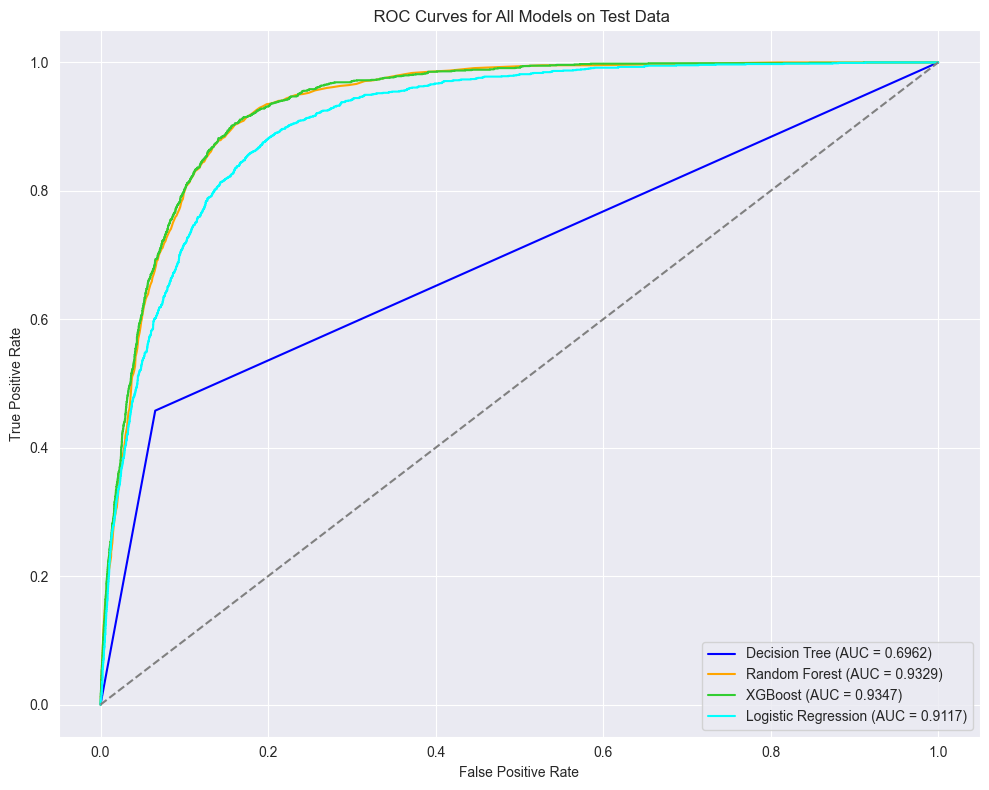

In [86]:
# 2. Plot ROC Curves Together
plt.figure(figsize=(10, 8))

colors = ['blue', 'orange', 'limegreen', 'cyan']
for name, y_proba, color in zip(model_names, probabilities, colors):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})', color=color)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title(" ROC Curves for All Models on Test Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


###  Observations:
- **XGBoost** has the highest ROC AUC (~0.93), showing excellent class separation.
- **Random Forest** closely follows with a strong AUC, indicating solid performance.
- **Logistic Regression** provides consistent AUC, reflecting good balance and generalizability.
- **Decision Tree** lags behind, with a noticeably lower curve — reflecting overfitting or weak generalization.

## Final Conclusion

---

### Final Model Choice:

- For **balanced performance**: **XGBoost**
  - Highest accuracy and ROC AUC.
  - Strong F1 score and recall make it reliable for overall success prediction.

- For **minimizing false negatives**: **Logistic Regression**
  - Best recall, indicating fewer missed "yes" predictions (clients who would subscribe).
  - Strong ROC AUC and competitive F1 score.

- For **precision-focused tasks**: **Random Forest**
  - High precision implies fewer false positives—useful in minimizing unnecessary follow-ups with uninterested clients.
  - Strong ROC AUC, though slightly weaker in recall and F1 score.

---

###  Business Implication

The choice of model should align with the business objective:

- If the goal is to **maximize overall performance and balance**, XGBoost is the most effective.
- If the priority is to **capture every potential customer** even at the cost of false positives, Logistic Regression is preferred.
- If the focus is on **contacting only the most promising clients** (to save marketing cost), Random Forest should be used.

---

**Recommendation**: Deploy **XGBoost** for initial rollout, while exploring **Logistic Regression** or **Random Forest** as complementary models in specific campaign strategies.

